# 📊 Data Visualization Lab Exercises
## Using Matplotlib and Seaborn

---

**Objectives:**
- Understand the fundamentals of data visualization in Python
- Create various types of plots using Matplotlib and Seaborn
- Learn when to use different visualization types
- Customize and style visualizations for better presentation

**Prerequisites:**
- Basic Python knowledge
- Familiarity with NumPy and Pandas

---

## Setup and Imports

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install matplotlib seaborn pandas numpy

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# For reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


---
## Part 1: Understanding the Data

We'll work with multiple datasets throughout this lab:
1. **Synthetic student data** - for basic plots
2. **Seaborn's built-in datasets** - for advanced visualizations

In [ ]:
# Create synthetic student performance dataset
np.random.seed(42)
n_students = 100

student_data = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'study_hours': np.random.uniform(1, 10, n_students),
    'sleep_hours': np.random.uniform(4, 9, n_students),
    'attendance': np.random.uniform(60, 100, n_students),
    'previous_score': np.random.uniform(40, 90, n_students),
    'gender': np.random.choice(['Male', 'Female'], n_students),
    'department': np.random.choice(['Computer Science', 'Electronics', 'Mechanical', 'Civil'], n_students)
})

# Create exam score based on other factors (with some noise)
student_data['exam_score'] = (
    5 * student_data['study_hours'] +
    2 * student_data['sleep_hours'] +
    0.3 * student_data['attendance'] +
    0.2 * student_data['previous_score'] +
    np.random.normal(0, 5, n_students)
).clip(0, 100)

print("Student Data Shape:", student_data.shape)
student_data.head(10)

Student Data Shape: (100, 8)


,student_id,study_hours,sleep_hours,attendance,previous_score,gender,department,exam_score
0,1,4.370861,4.157146,85.681266,42.584086,Male,Computer Science,66.098574
1,2,9.556429,7.182052,63.365599,66.567732,Female,Civil,100.000000
2,3,7.587945,5.571780,66.465149,67.031756,Male,Electronics,87.181302
3,4,6.387926,6.542853,95.942168,71.871495,Male,Mechanical,85.297770
4,5,2.404168,8.537832,84.257162,76.304567,Female,Mechanical,65.142492
5,6,2.403951,5.246461,60.367882,88.792604,Female,Electronics,60.841157
6,7,1.522753,6.051915,64.058862,65.815017,Female,Electronics,45.497088
7,8,8.795585,7.777756,86.540071,56.147824,Male,Mechanical,100.000000
8,9,6.410035,5.143991,60.202463,79.759310,Female,Mechanical,82.247959
9,10,7.372653,4.384900,66.432322,53.541613,Male,Electronics,73.925206


In [ ]:
# Load Seaborn's built-in datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')

print("Datasets loaded:")
print(f"  - Tips: {tips.shape}")
print(f"  - Iris: {iris.shape}")
print(f"  - Flights: {flights.shape}")
print(f"  - Titanic: {titanic.shape}")

Datasets loaded:
  - Tips: (244, 7)
  - Iris: (150, 5)
  - Flights: (144, 3)
  - Titanic: (891, 15)


---
# 📈 Exercise 1: Scatter Plots

**Purpose:** Show relationships between two continuous variables

**When to use:**
- Exploring correlations
- Identifying clusters or outliers
- Visualizing distributions of paired data

### 1.1 Basic Scatter Plot with Matplotlib

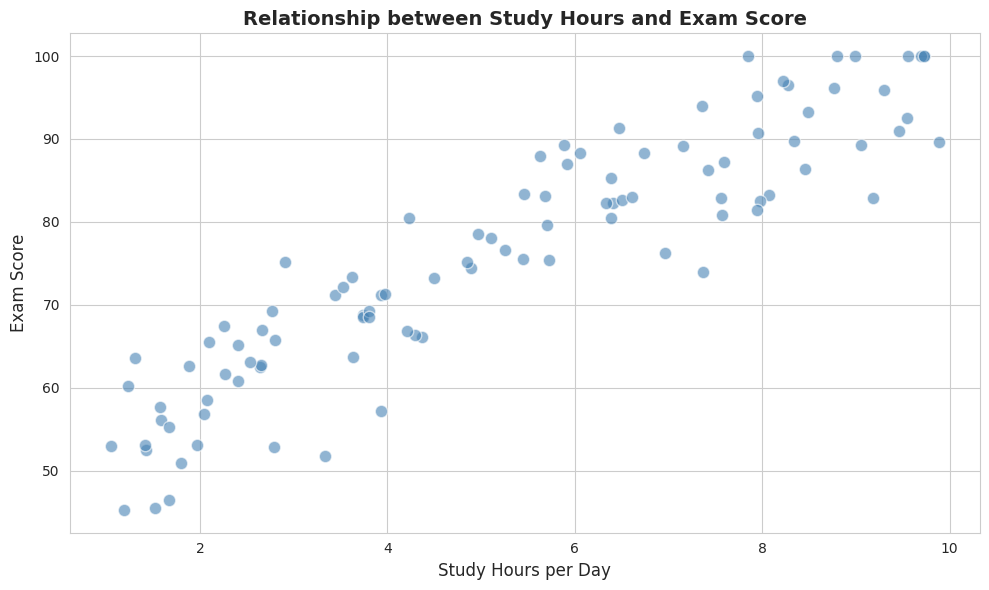

In [ ]:
# Basic scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(student_data['study_hours'], student_data['exam_score'],
            alpha=0.6, color='steelblue', edgecolors='white', s=80)

plt.xlabel('Study Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Relationship between Study Hours and Exam Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.2 Enhanced Scatter Plot with Color Encoding

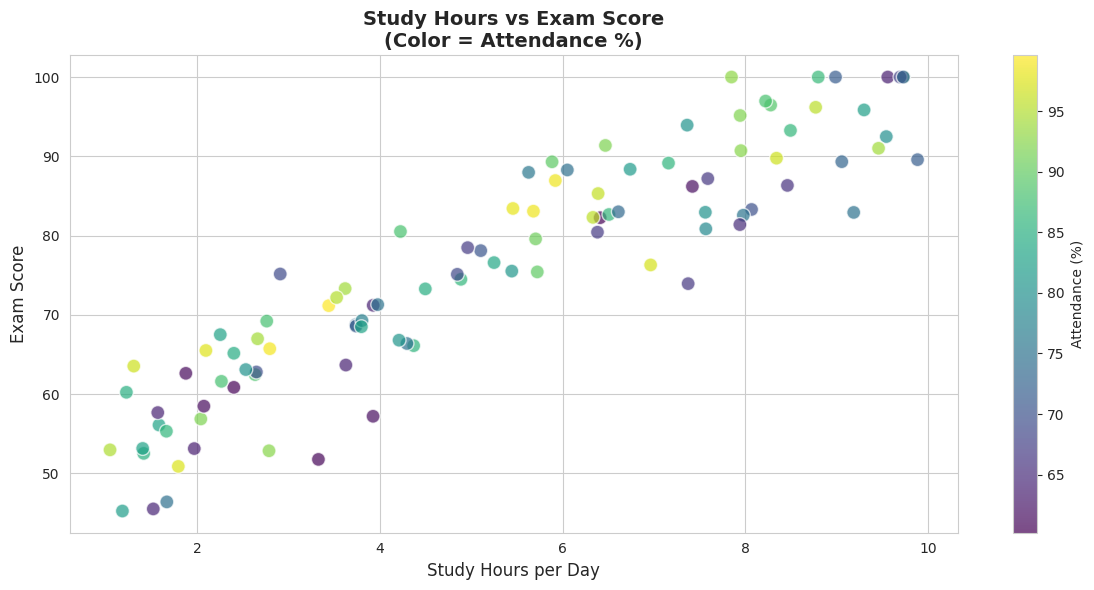

In [ ]:
# Scatter plot with color representing a third variable
plt.figure(figsize=(12, 6))

scatter = plt.scatter(student_data['study_hours'], student_data['exam_score'],
                      c=student_data['attendance'], cmap='viridis',
                      alpha=0.7, s=100, edgecolors='white')

plt.colorbar(scatter, label='Attendance (%)')
plt.xlabel('Study Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Study Hours vs Exam Score\n(Color = Attendance %)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.3 Scatter Plot with Seaborn

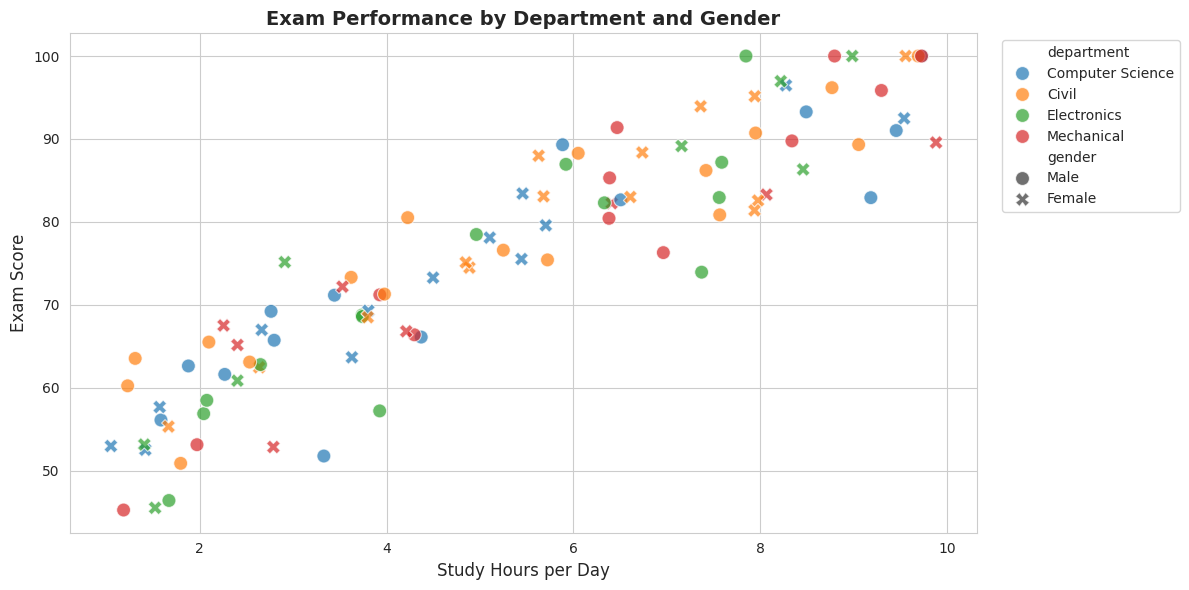

In [ ]:
# Seaborn scatter plot with hue (categorical coloring)
plt.figure(figsize=(12, 6))

sns.scatterplot(data=student_data, x='study_hours', y='exam_score',
                hue='department', style='gender', s=100, alpha=0.7)

plt.xlabel('Study Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Exam Performance by Department and Gender', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 1.4 Scatter Plot with Regression Line

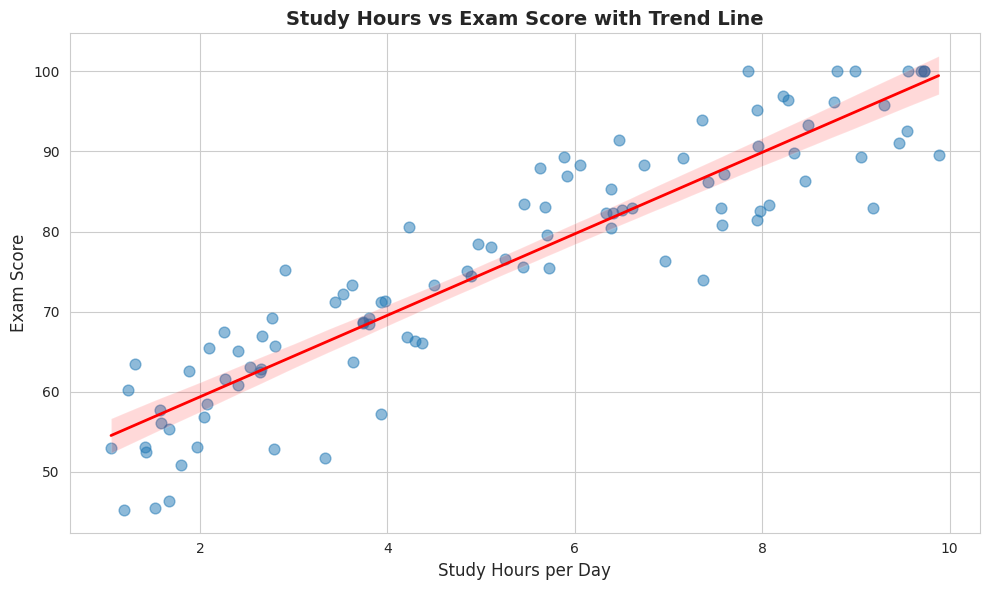

In [ ]:
# Regression plot (scatter + trend line)
plt.figure(figsize=(10, 6))

sns.regplot(data=student_data, x='study_hours', y='exam_score',
            scatter_kws={'alpha': 0.5, 's': 60},
            line_kws={'color': 'red', 'linewidth': 2})

plt.xlabel('Study Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Study Hours vs Exam Score with Trend Line', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### ✍️ Practice Exercise 1
Create a scatter plot using the `tips` dataset showing the relationship between `total_bill` and `tip`, with different colors for `time` (Lunch/Dinner).

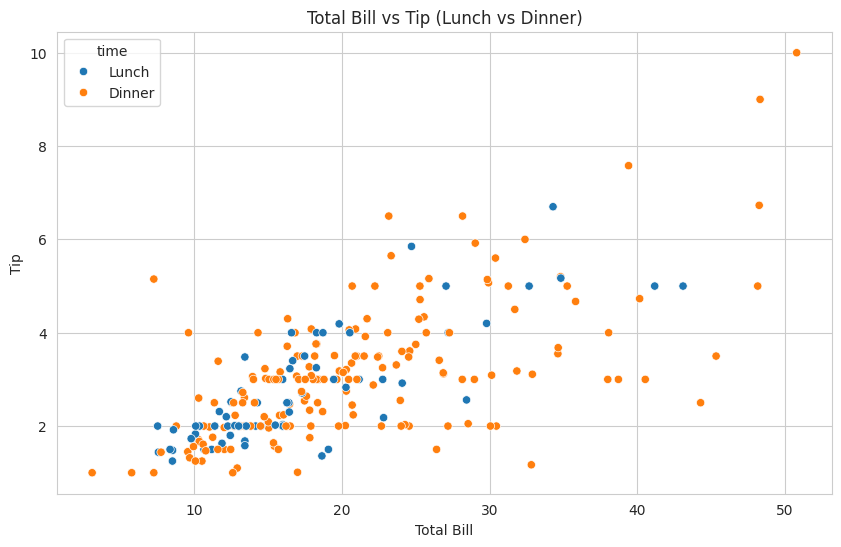

In [ ]:
# YOUR CODE HERE
# Hint: Use sns.scatterplot() with hue='time'
tips = sns.load_dataset("tips")
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time"
)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip (Lunch vs Dinner)")
plt.show()


---
# 📉 Exercise 2: Line Plots

**Purpose:** Show trends over time or ordered categories

**When to use:**
- Time series data
- Continuous data with a natural order
- Comparing trends across groups

### 2.1 Basic Line Plot with Matplotlib

/tmp/ipython-input-2421392357.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2024-01-01', periods=12, freq='M')


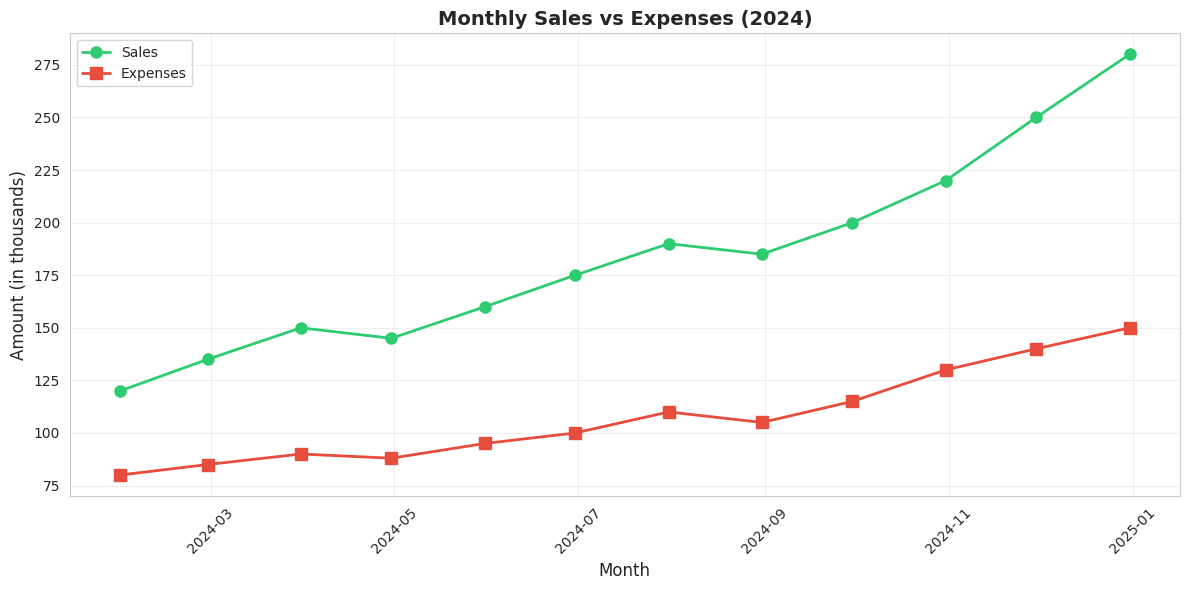

In [ ]:
# Create time series data
months = pd.date_range(start='2024-01-01', periods=12, freq='M')
sales = [120, 135, 150, 145, 160, 175, 190, 185, 200, 220, 250, 280]
expenses = [80, 85, 90, 88, 95, 100, 110, 105, 115, 130, 140, 150]

plt.figure(figsize=(12, 6))

plt.plot(months, sales, marker='o', linewidth=2, markersize=8, label='Sales', color='#2ecc71')
plt.plot(months, expenses, marker='s', linewidth=2, markersize=8, label='Expenses', color='#e74c3c')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount (in thousands)', fontsize=12)
plt.title('Monthly Sales vs Expenses (2024)', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.2 Line Plot with Confidence Interval (Seaborn)

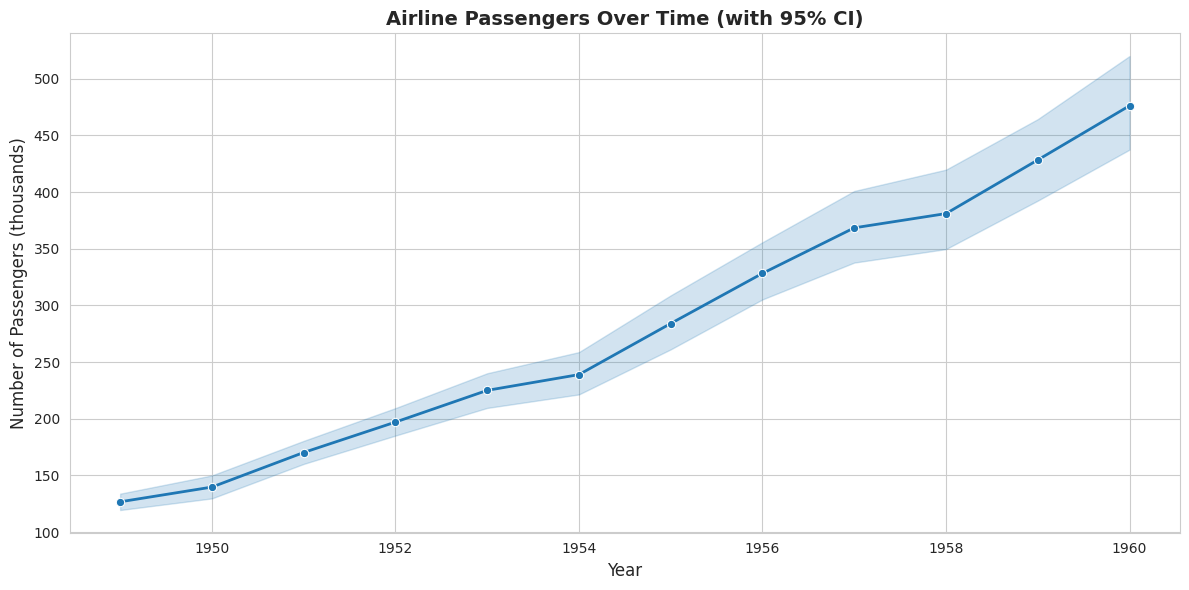

In [ ]:
# Using flights dataset
plt.figure(figsize=(12, 6))

sns.lineplot(data=flights, x='year', y='passengers', marker='o', linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers (thousands)', fontsize=12)
plt.title('Airline Passengers Over Time (with 95% CI)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.3 Multiple Line Plot with Hue

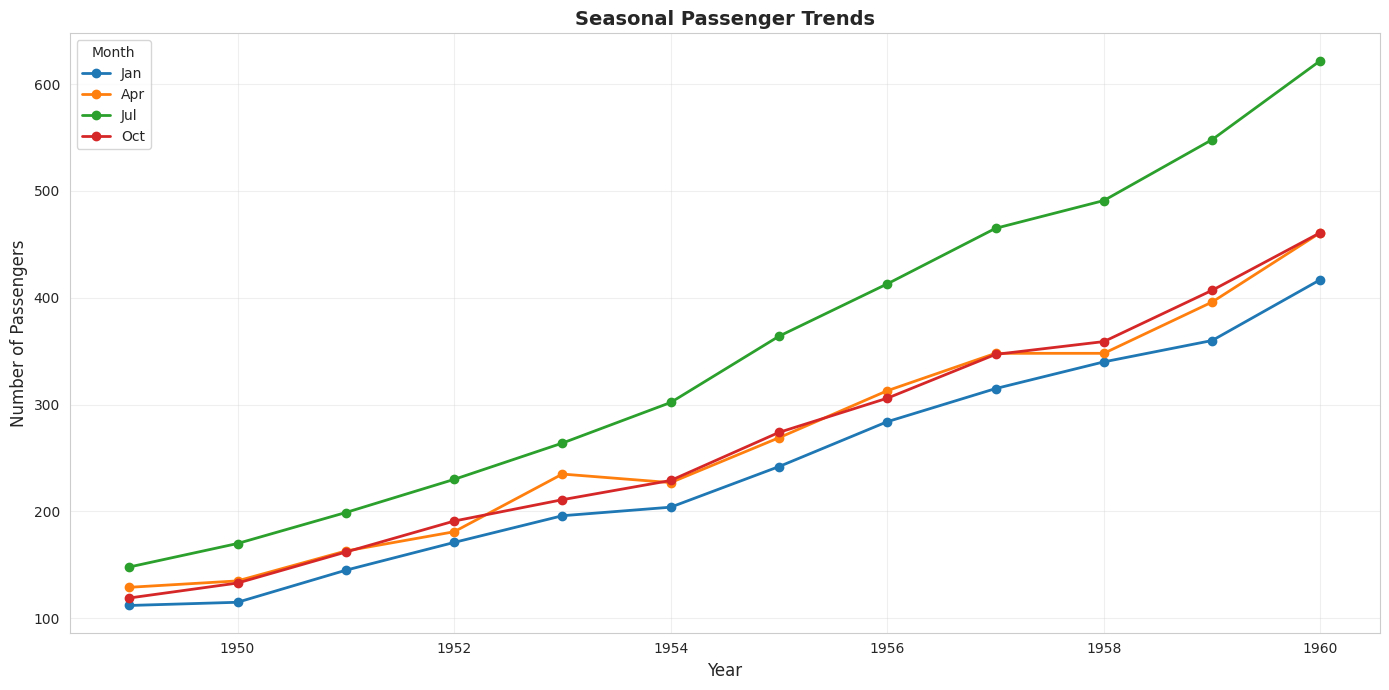

In [ ]:
# Pivot flights data for visualization
flights_wide = flights.pivot(index='year', columns='month', values='passengers')

plt.figure(figsize=(14, 7))

# Plot each month
for month in ['Jan', 'Apr', 'Jul', 'Oct']:
    plt.plot(flights_wide.index, flights_wide[month], marker='o', label=month, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title('Seasonal Passenger Trends', fontsize=14, fontweight='bold')
plt.legend(title='Month')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4 Area Plot

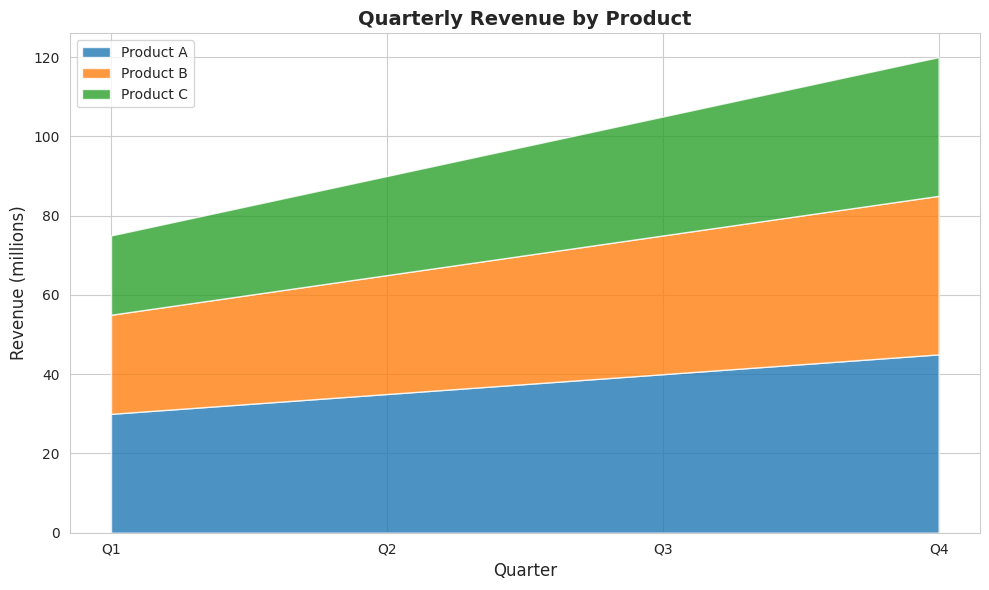

In [ ]:
# Stacked area plot
categories = ['Product A', 'Product B', 'Product C']
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
data = {
    'Product A': [30, 35, 40, 45],
    'Product B': [25, 30, 35, 40],
    'Product C': [20, 25, 30, 35]
}

plt.figure(figsize=(10, 6))

plt.stackplot(quarters, data.values(), labels=data.keys(), alpha=0.8)

plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Revenue (millions)', fontsize=12)
plt.title('Quarterly Revenue by Product', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### ✍️ Practice Exercise 2
Create a line plot showing the trend of passengers for each month across all years using the `flights` dataset with seaborn's `lineplot` and `hue='month'`.

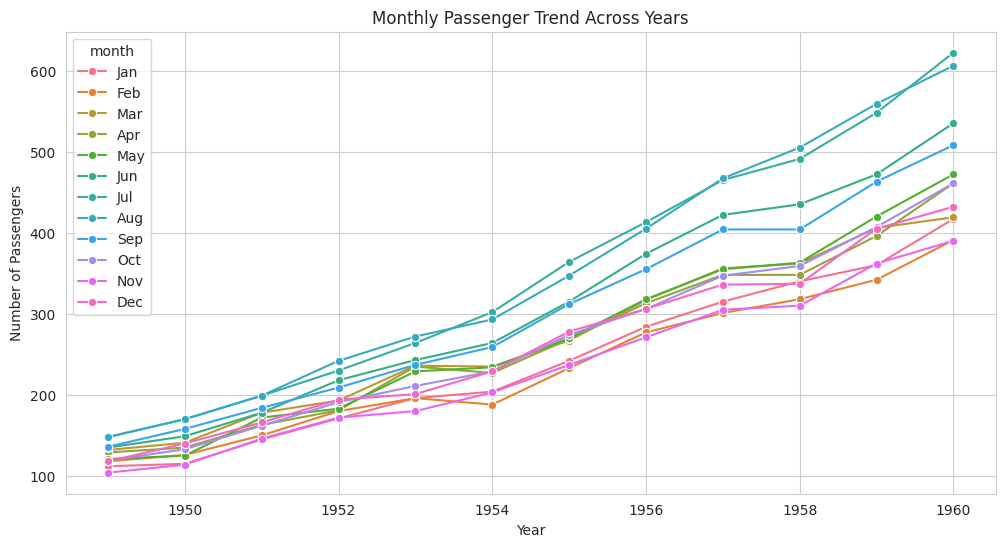

In [ ]:
# YOUR CODE HERE
flights=sns.load_dataset("flights")
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x="year", y="passengers", hue="month",marker="o")
plt.title("Monthly Passenger Trend Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()


---
# 📊 Exercise 3: Bar Plots

**Purpose:** Compare quantities across categories

**When to use:**
- Comparing discrete categories
- Showing frequency/counts
- Displaying rankings

### 3.1 Basic Bar Plot

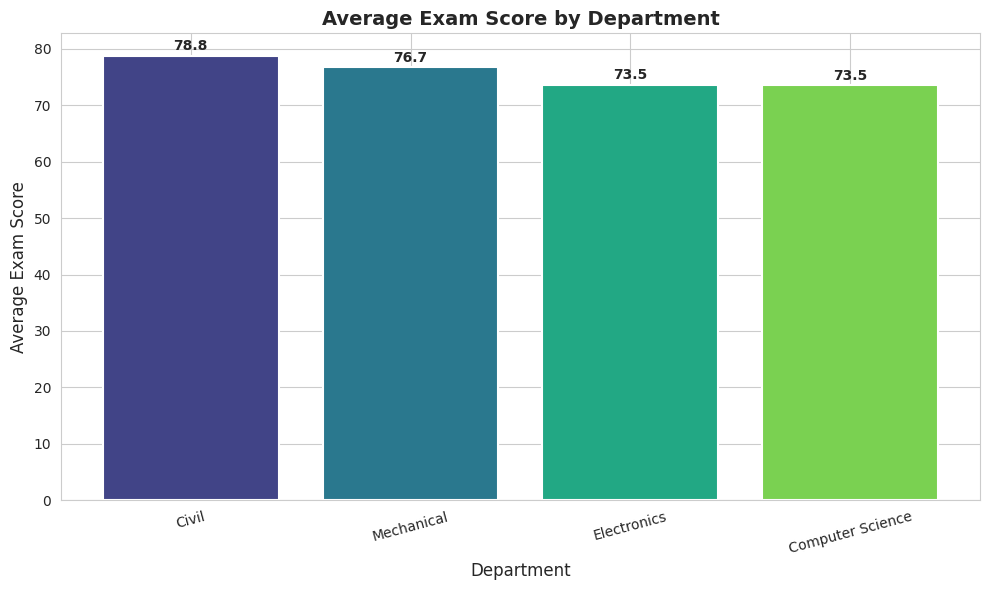

In [ ]:
# Average exam score by department
dept_scores = student_data.groupby('department')['exam_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(dept_scores)))
bars = plt.bar(dept_scores.index, dept_scores.values, color=colors, edgecolor='white', linewidth=1.5)

# Add value labels on bars
for bar, value in zip(bars, dept_scores.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.title('Average Exam Score by Department', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 3.2 Grouped Bar Plot

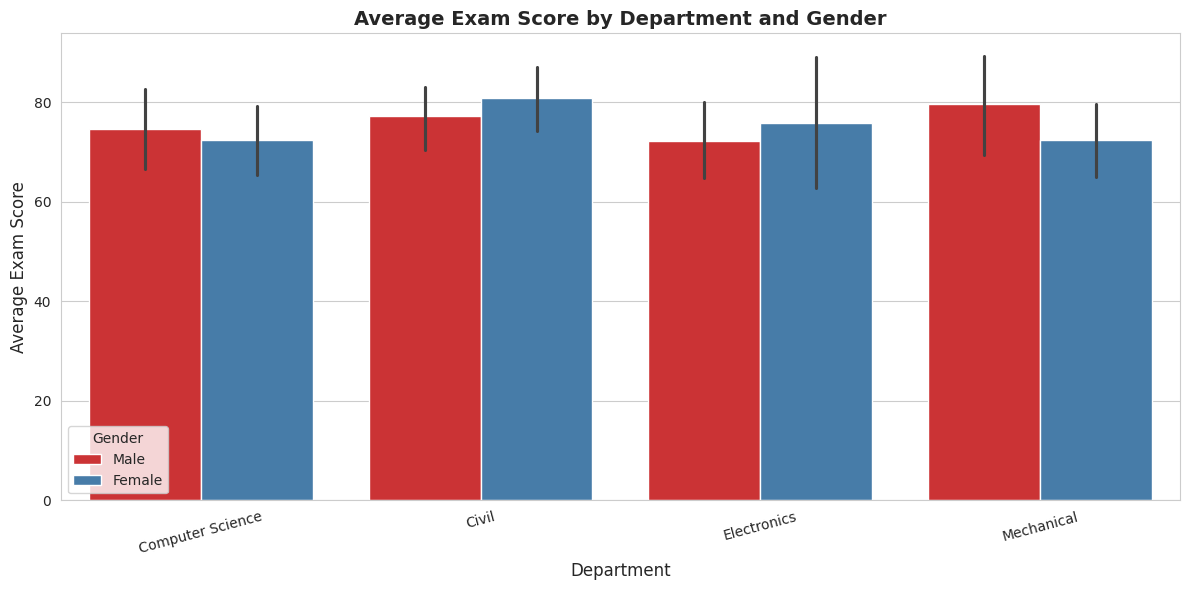

In [ ]:
# Grouped bar plot with Seaborn
plt.figure(figsize=(12, 6))

sns.barplot(data=student_data, x='department', y='exam_score', hue='gender',
            palette='Set1', edgecolor='white')

plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.title('Average Exam Score by Department and Gender', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 3.3 Horizontal Bar Plot

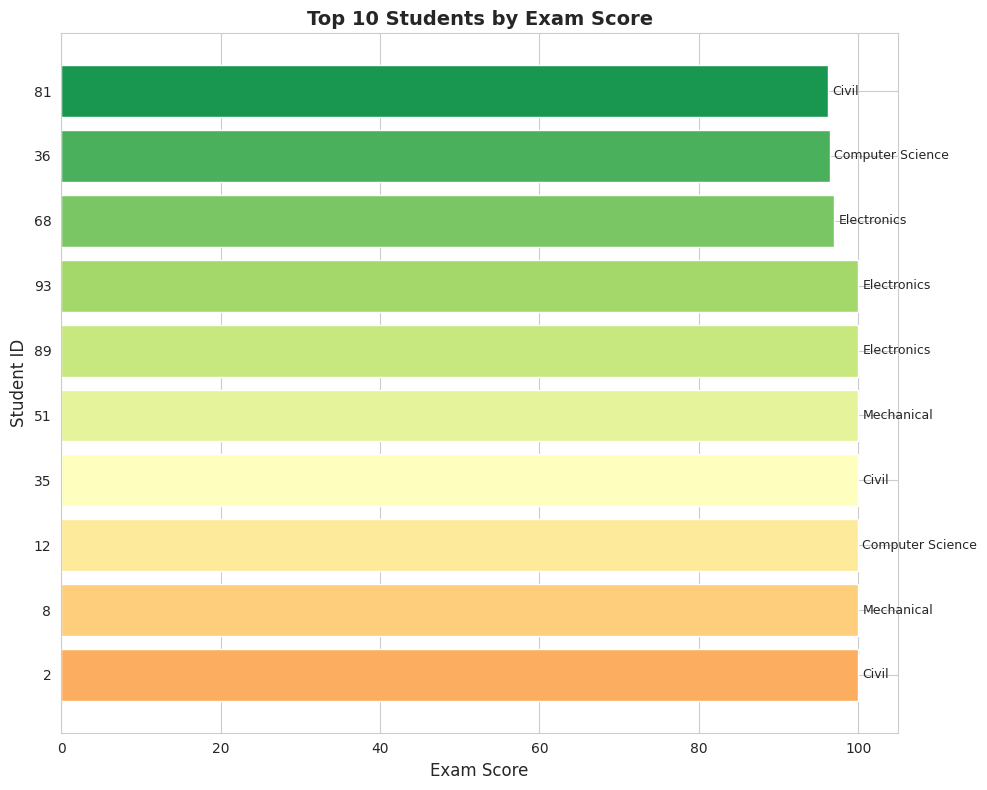

In [ ]:
# Horizontal bar plot (good for many categories or long labels)
plt.figure(figsize=(10, 8))

# Top 10 students by exam score
top_students = student_data.nlargest(10, 'exam_score')[['student_id', 'exam_score', 'department']]

colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_students)))
plt.barh(top_students['student_id'].astype(str), top_students['exam_score'], color=colors)

plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Student ID', fontsize=12)
plt.title('Top 10 Students by Exam Score', fontsize=14, fontweight='bold')

# Add department labels
for i, (score, dept) in enumerate(zip(top_students['exam_score'], top_students['department'])):
    plt.text(score + 0.5, i, dept, va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 3.4 Stacked Bar Plot

<Figure size 1000x600 with 0 Axes>

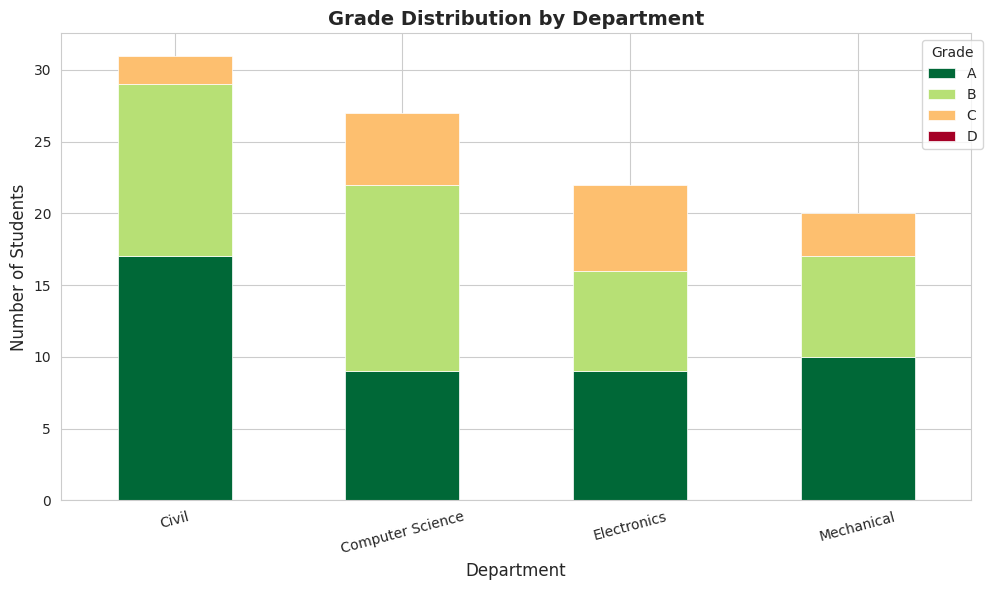

In [ ]:
# Create grade categories
def assign_grade(score):
    if score >= 80: return 'A'
    elif score >= 60: return 'B'
    elif score >= 40: return 'C'
    else: return 'D'

student_data['grade'] = student_data['exam_score'].apply(assign_grade)

# Count by department and grade
grade_counts = pd.crosstab(student_data['department'], student_data['grade'])

#grade_counts = grade_counts[['A', 'B', 'C', 'D']]  # Reorder columns
grade_counts = grade_counts.reindex(columns=['A', 'B', 'C', 'D'], fill_value=0)

# Stacked bar plot
plt.figure(figsize=(10, 6))

grade_counts.plot(kind='bar', stacked=True, colormap='RdYlGn_r', edgecolor='white', linewidth=0.5)

plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Grade Distribution by Department', fontsize=14, fontweight='bold')
plt.legend(title='Grade', bbox_to_anchor=(1.02, 1))
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 3.5 Count Plot (Special Bar Plot)

/tmp/ipython-input-3215439211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tips, x='day', palette='pastel', ax=axes[0], order=['Thur', 'Fri', 'Sat', 'Sun'])


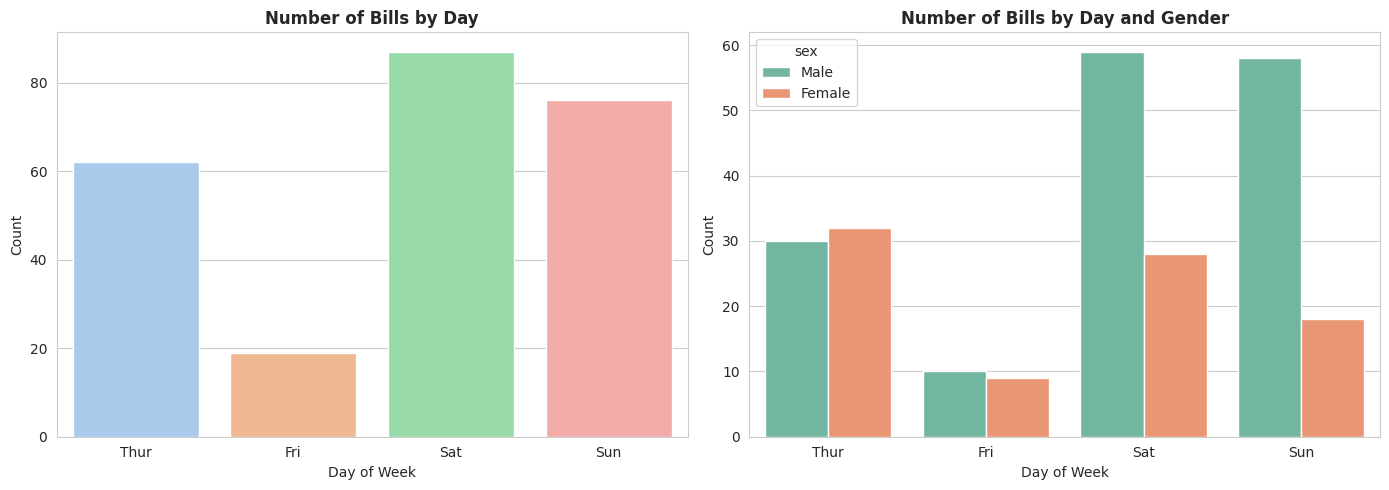

In [ ]:
# Count plot for categorical data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Simple count plot
sns.countplot(data=tips, x='day', palette='pastel', ax=axes[0], order=['Thur', 'Fri', 'Sat', 'Sun'])
axes[0].set_title('Number of Bills by Day', fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

# Count plot with hue
sns.countplot(data=tips, x='day', hue='sex', palette='Set2', ax=axes[1], order=['Thur', 'Fri', 'Sat', 'Sun'])
axes[1].set_title('Number of Bills by Day and Gender', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### ✍️ Practice Exercise 3
Create a bar plot showing the survival rate (proportion who survived) for each passenger class in the `titanic` dataset. Use `sns.barplot()` with `x='class'` and `y='survived'`.

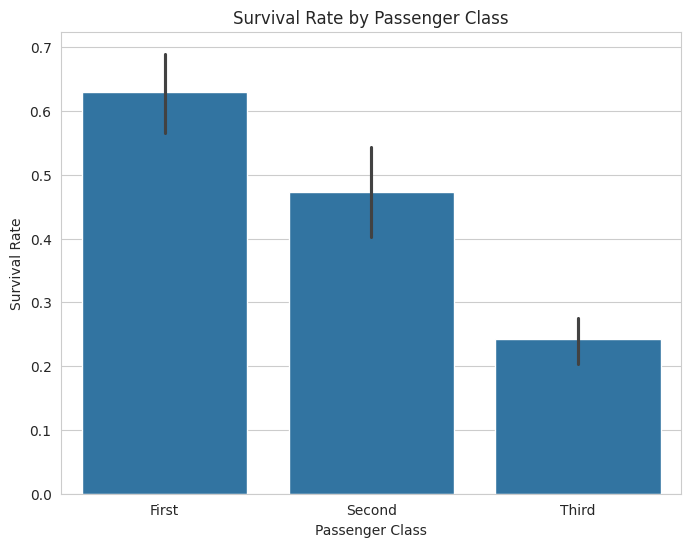

In [ ]:
# YOUR CODE HERE
titanic=sns.load_dataset("titanic")
plt.figure(figsize=(8,6))
sns.barplot(data=titanic, x="class", y="survived")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


---
# 🔥 Exercise 4: Heatmaps

**Purpose:** Show patterns in matrix data or correlations

**When to use:**
- Correlation matrices
- Time-based patterns (calendar heatmaps)
- Cross-tabulation data

### 4.1 Correlation Heatmap

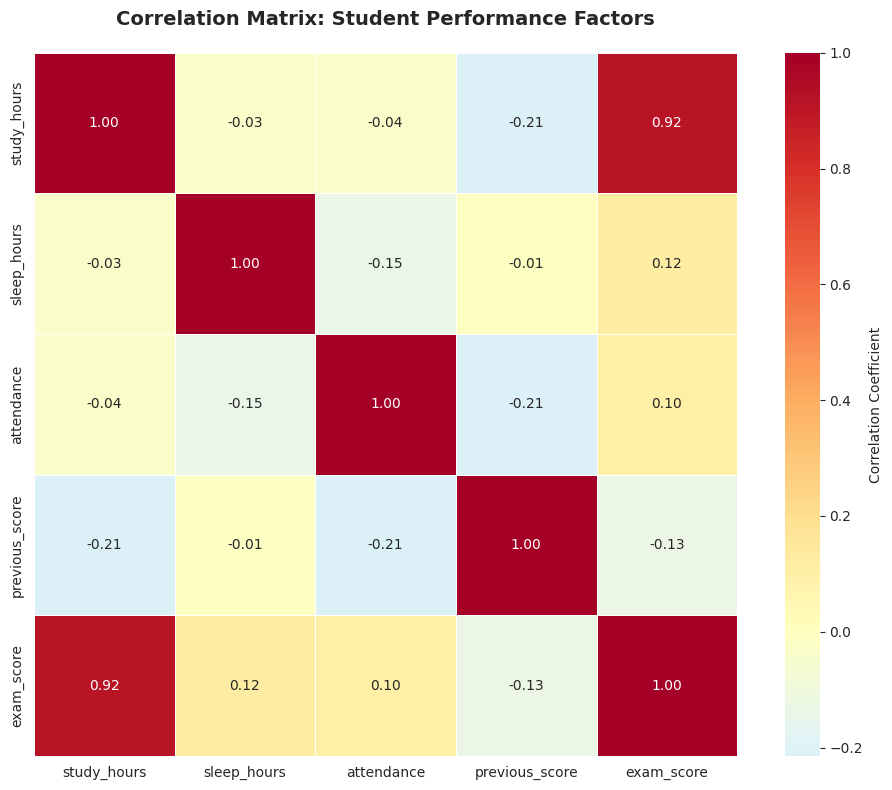

In [ ]:
# Calculate correlation matrix
numeric_cols = ['study_hours', 'sleep_hours', 'attendance', 'previous_score', 'exam_score']
correlation_matrix = student_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            annot=True,           # Show values
            fmt='.2f',            # Format to 2 decimal places
            cmap='RdYlBu_r',      # Color map (red=negative, blue=positive)
            center=0,             # Center color at 0
            square=True,          # Square cells
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix: Student Performance Factors', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### 4.2 Heatmap with Mask (Lower Triangle Only)

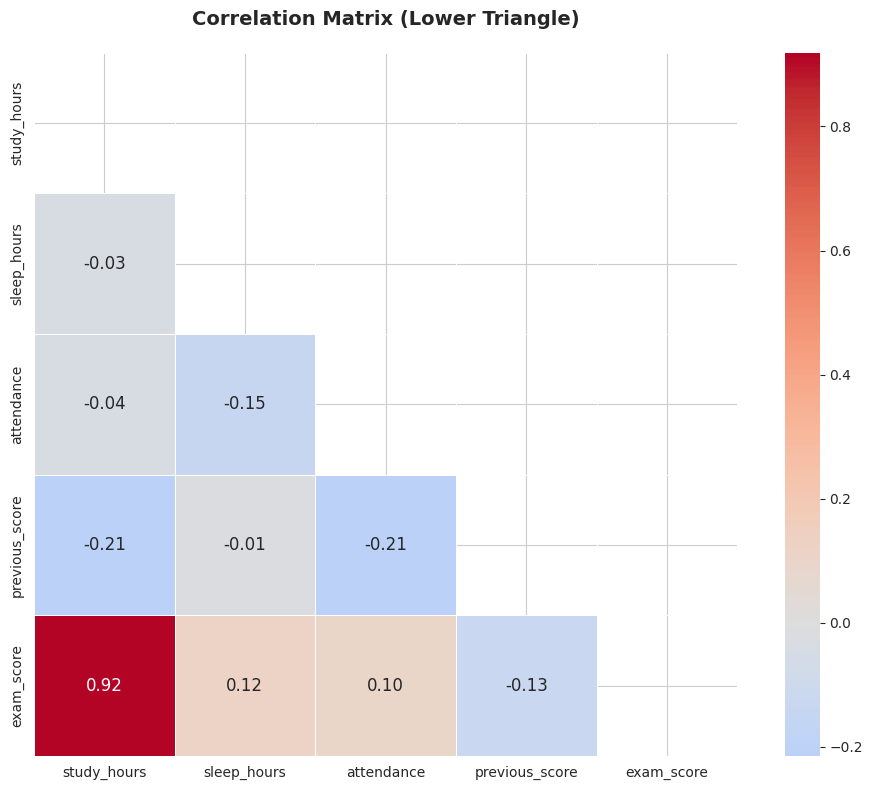

In [ ]:
# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={'size': 12})

plt.title('Correlation Matrix (Lower Triangle)', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### 4.3 Calendar Heatmap (Pivot Table)

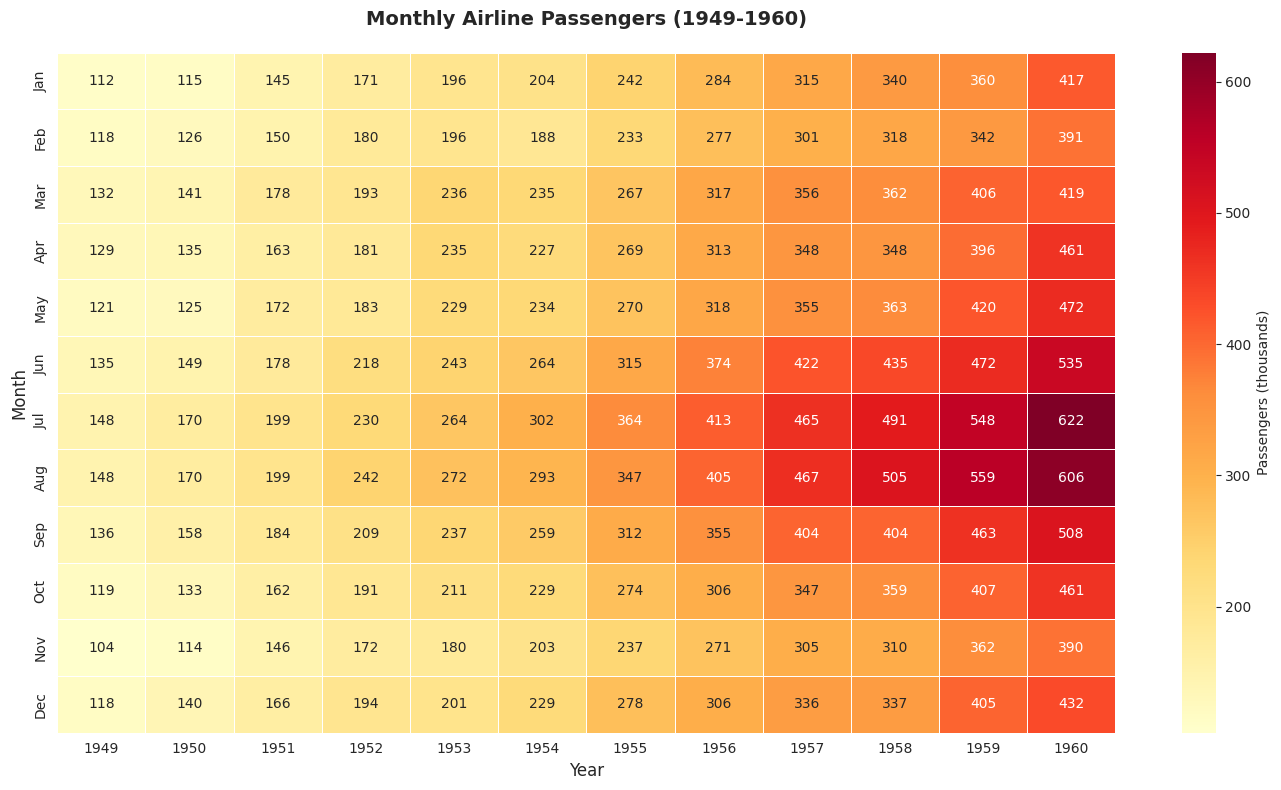

In [ ]:
# Pivot the flights data
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')

plt.figure(figsize=(14, 8))

sns.heatmap(flights_pivot,
            annot=True,
            fmt='d',              # Integer format
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Passengers (thousands)'})

plt.title('Monthly Airline Passengers (1949-1960)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

plt.tight_layout()
plt.show()

### 4.4 Clustered Heatmap

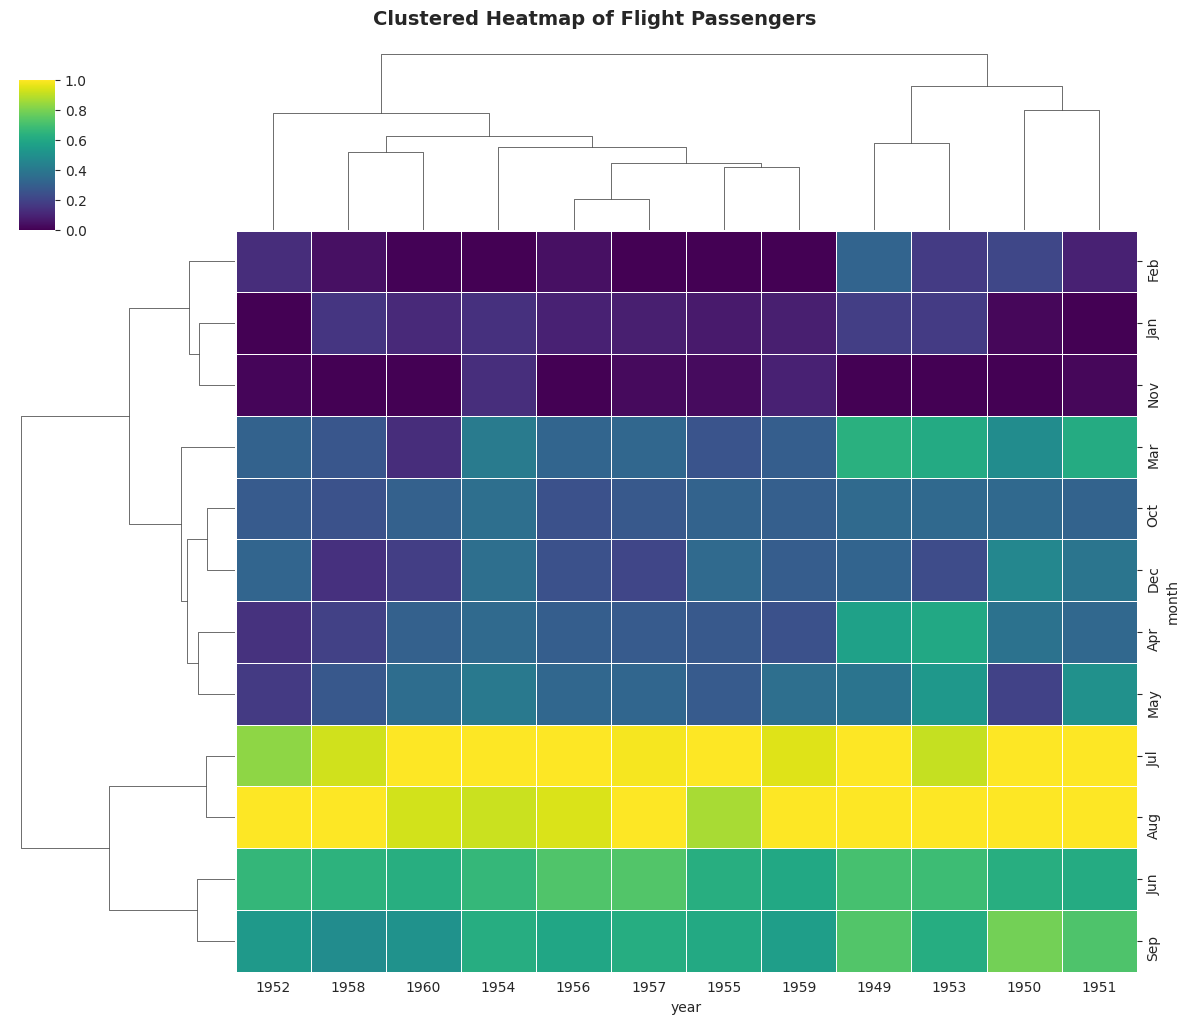

In [ ]:
# Clustermap groups similar rows and columns together
g = sns.clustermap(flights_pivot,
                   cmap='viridis',
                   linewidths=0.5,
                   figsize=(12, 10),
                   standard_scale=1,  # Standardize columns
                   cbar_pos=(0.02, 0.8, 0.03, 0.15))

g.fig.suptitle('Clustered Heatmap of Flight Passengers', fontsize=14, fontweight='bold', y=1.02)

plt.show()

### ✍️ Practice Exercise 4
Create a correlation heatmap for the numerical columns in the `iris` dataset (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`).

<Axes: >

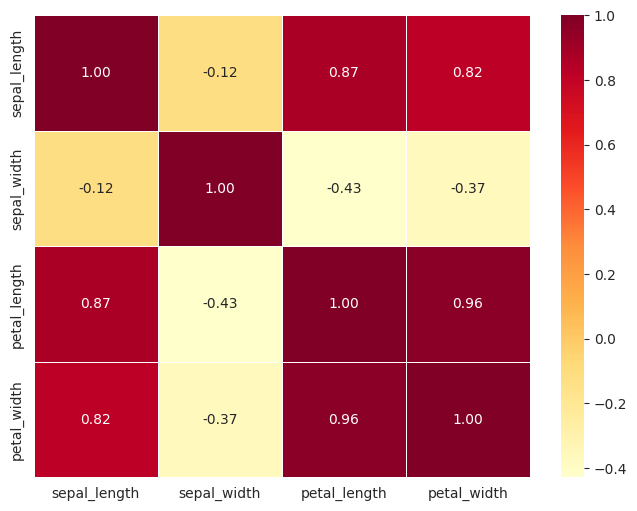

In [ ]:
# YOUR CODE HERE
iris=sns.load_dataset("iris")
numeric_cols = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="YlOrRd",
    fmt=".2f",
    linewidths=0.5
)



---
# 📦 Exercise 5: Box Plots

**Purpose:** Show distribution summary and identify outliers

**When to use:**
- Comparing distributions across groups
- Identifying outliers
- Showing median, quartiles, and range

### 5.1 Basic Box Plot

/tmp/ipython-input-2440497877.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=departments, patch_artist=True)


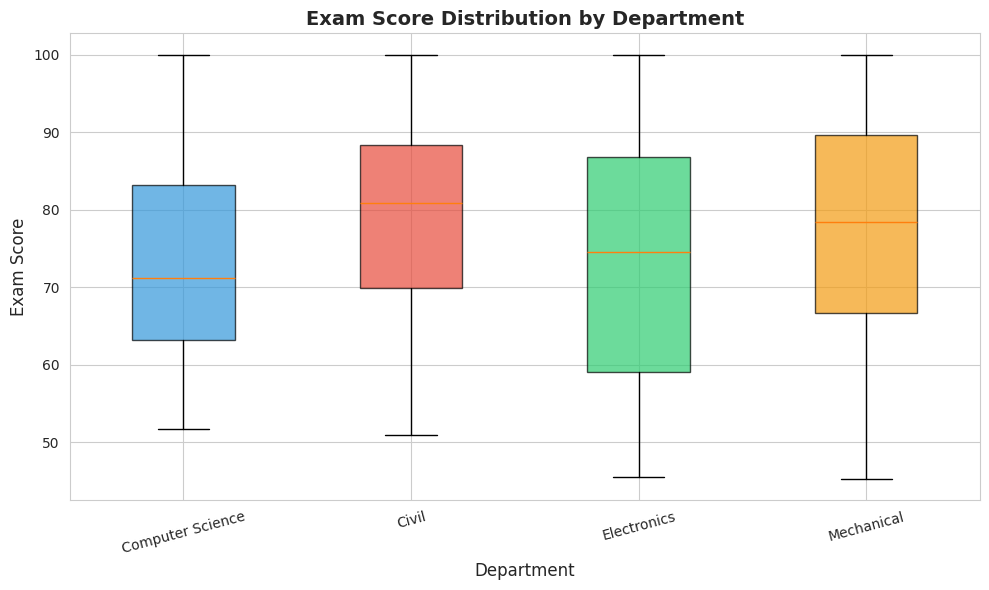

In [ ]:
# Box plot with Matplotlib
plt.figure(figsize=(10, 6))

departments = student_data['department'].unique()
data_to_plot = [student_data[student_data['department'] == dept]['exam_score'] for dept in departments]

bp = plt.boxplot(data_to_plot, labels=departments, patch_artist=True)

# Customize colors
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Department', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Exam Score Distribution by Department', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 5.2 Box Plot with Seaborn

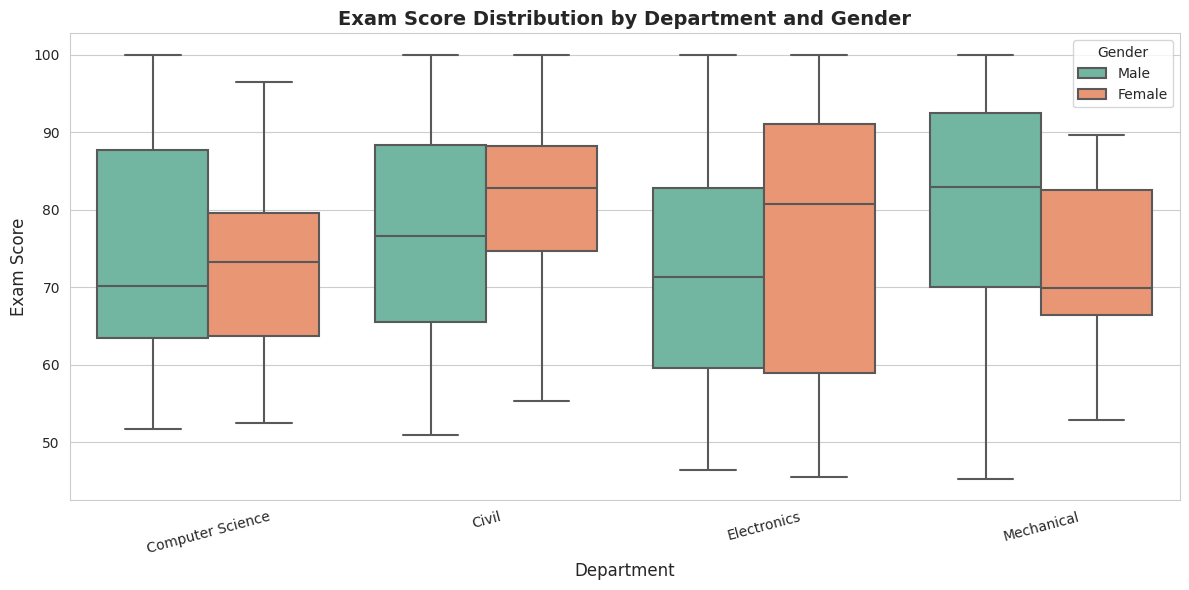

In [ ]:
# Seaborn box plot with hue
plt.figure(figsize=(12, 6))

sns.boxplot(data=student_data, x='department', y='exam_score', hue='gender',
            palette='Set2', linewidth=1.5)

plt.xlabel('Department', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Exam Score Distribution by Department and Gender', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### 5.3 Box Plot with Swarm Overlay

/tmp/ipython-input-2388006915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'],


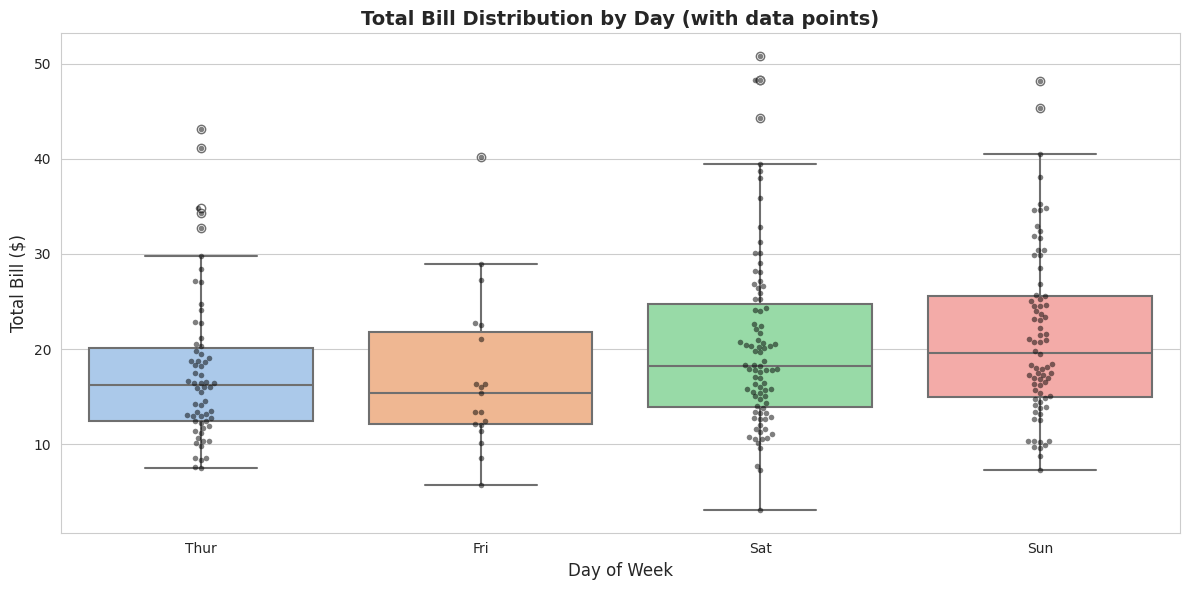

In [ ]:
# Box plot + Swarm plot (shows individual points)
plt.figure(figsize=(12, 6))

sns.boxplot(data=tips, x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'],
            palette='pastel', linewidth=1.5)

sns.swarmplot(data=tips, x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'],
              color='black', alpha=0.5, size=4)

plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.title('Total Bill Distribution by Day (with data points)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.4 Violin Plot (Box + Distribution)

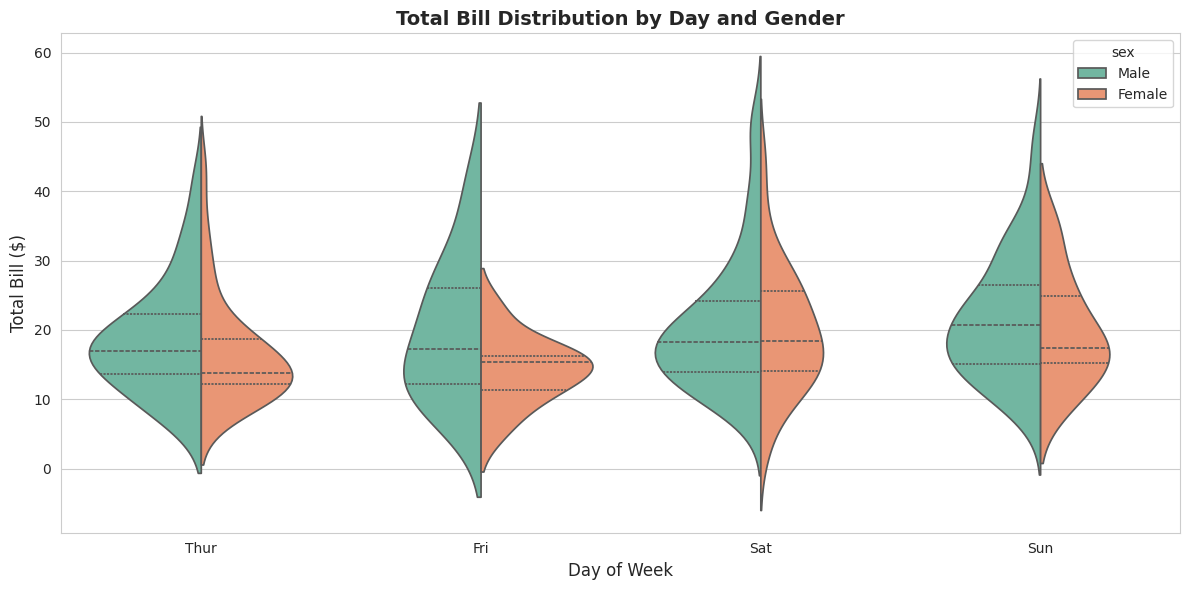

In [ ]:
# Violin plot shows full distribution shape
plt.figure(figsize=(12, 6))

sns.violinplot(data=tips, x='day', y='total_bill', hue='sex',
               split=True,  # Split violin by hue
               palette='Set2',
               order=['Thur', 'Fri', 'Sat', 'Sun'],
               inner='quart')  # Show quartiles inside

plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.title('Total Bill Distribution by Day and Gender', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.5 Horizontal Box Plot

/tmp/ipython-input-3163375491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='sepal_length', y='species',


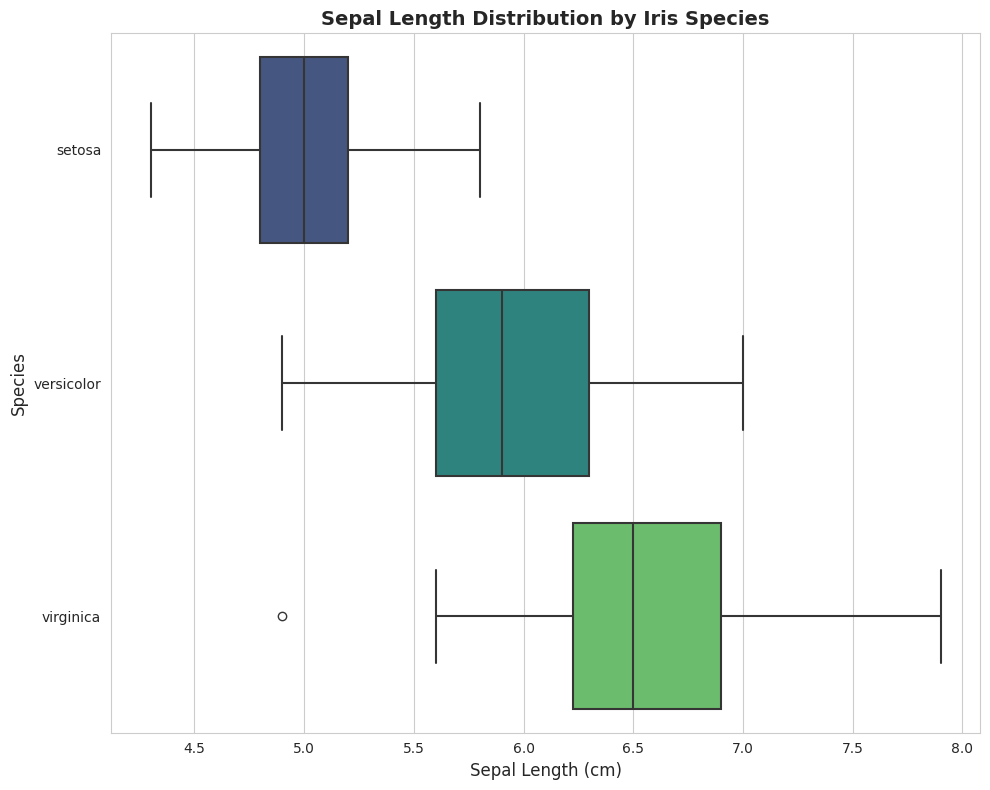

In [ ]:
# Horizontal box plot (useful for many categories)
plt.figure(figsize=(10, 8))

sns.boxplot(data=iris, x='sepal_length', y='species',
            palette='viridis', orient='h', linewidth=1.5)

plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.title('Sepal Length Distribution by Iris Species', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### ✍️ Practice Exercise 5
Create a violin plot showing the distribution of `tip` for each `day` in the `tips` dataset, split by `smoker` status.

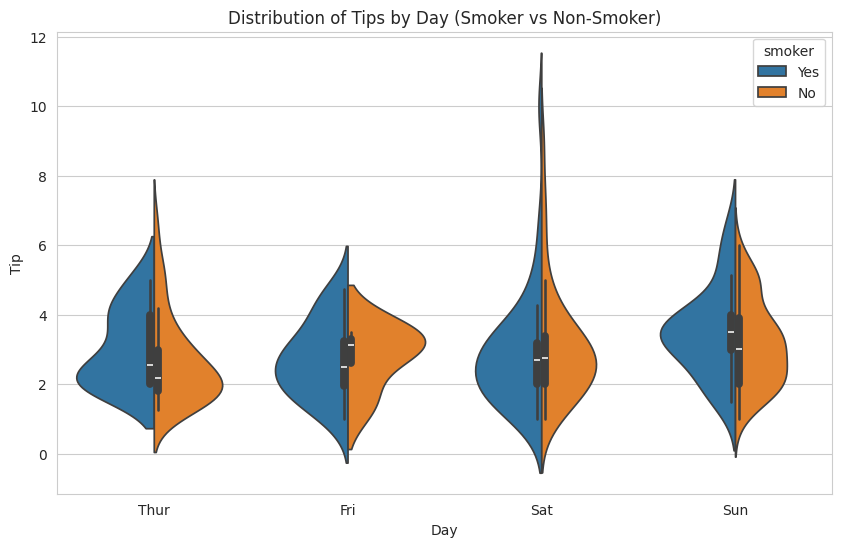

In [ ]:
# YOUR CODE HERE
sns.violinplot(
    data=tips,
    x="day",
    y="tip",
    hue="smoker",
    split=True
)
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Distribution of Tips by Day (Smoker vs Non-Smoker)")
plt.show()


---
# 📐 Exercise 6: Histograms and Density Plots

**Purpose:** Show the distribution of a single variable

**When to use:**
- Understanding data distribution
- Checking for normality
- Identifying skewness or multiple modes

### 6.1 Basic Histogram

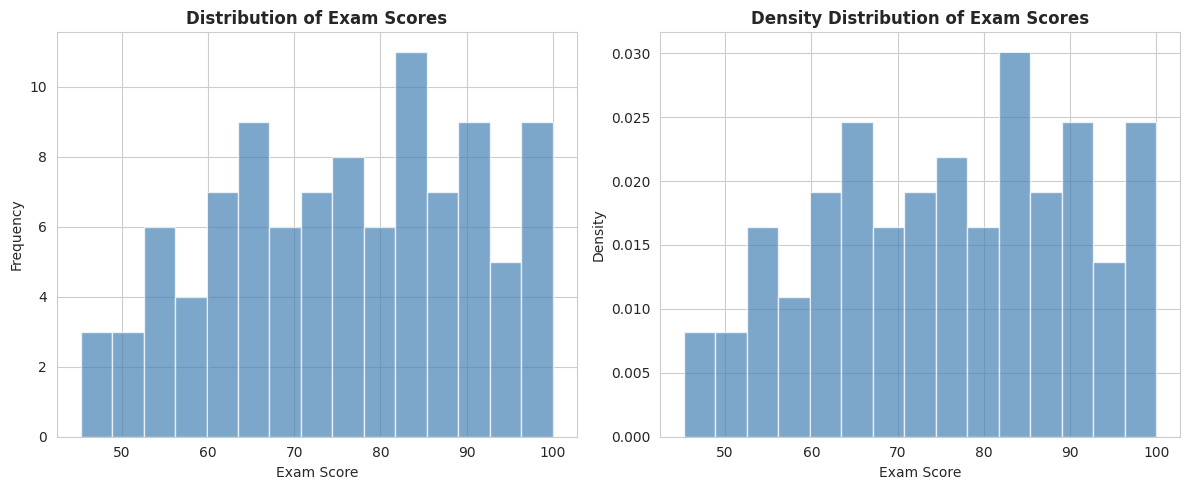

In [ ]:
# Matplotlib histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(student_data['exam_score'], bins=15, color='steelblue',
         edgecolor='white', alpha=0.7)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores', fontweight='bold')

plt.subplot(1, 2, 2)
plt.hist(student_data['exam_score'], bins=15, color='steelblue',
         edgecolor='white', alpha=0.7, density=True)  # Normalized
plt.xlabel('Exam Score')
plt.ylabel('Density')
plt.title('Density Distribution of Exam Scores', fontweight='bold')

plt.tight_layout()
plt.show()

### 6.2 Histogram with KDE (Seaborn)

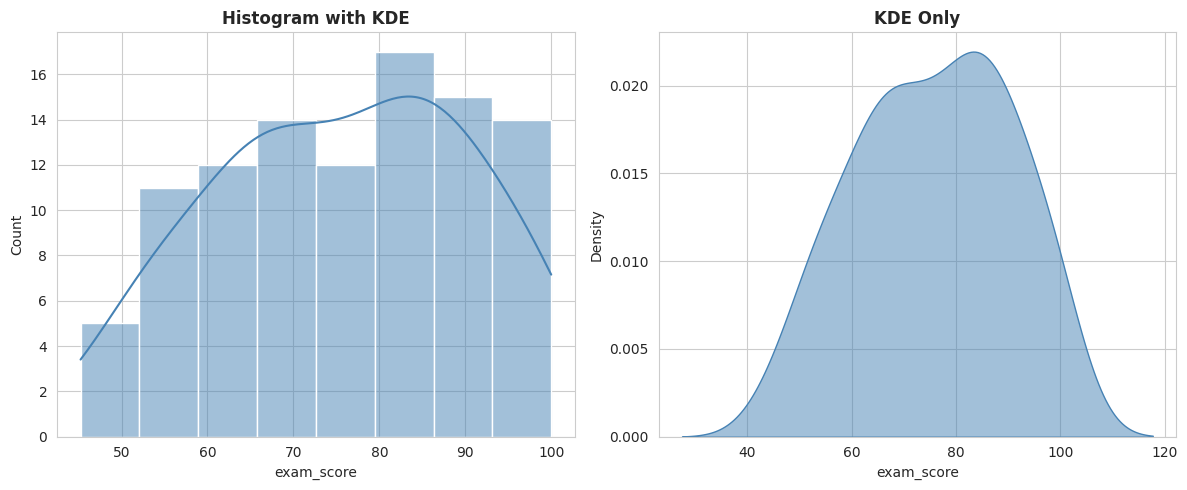

In [ ]:
# Histogram with Kernel Density Estimate
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=student_data, x='exam_score', kde=True,
             color='steelblue', edgecolor='white')
plt.title('Histogram with KDE', fontweight='bold')

plt.subplot(1, 2, 2)
sns.kdeplot(data=student_data, x='exam_score', fill=True,
            color='steelblue', alpha=0.5)
plt.title('KDE Only', fontweight='bold')

plt.tight_layout()
plt.show()

### 6.3 Multiple Distributions Comparison

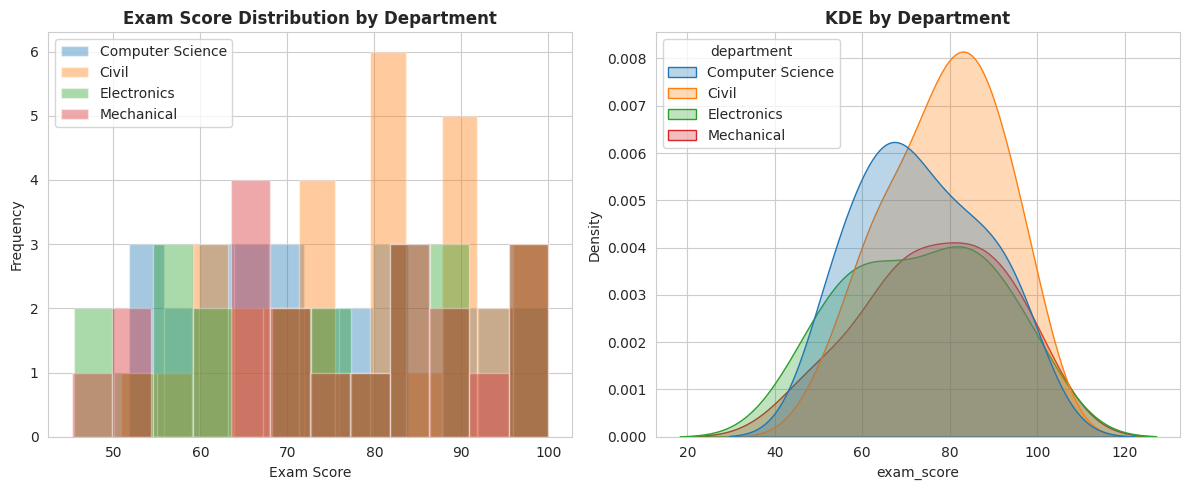

In [ ]:
# Compare distributions by category
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Overlapping histograms
for dept in student_data['department'].unique():
    subset = student_data[student_data['department'] == dept]
    plt.hist(subset['exam_score'], bins=12, alpha=0.4, label=dept, edgecolor='white')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Exam Score Distribution by Department', fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
# KDE comparison
sns.kdeplot(data=student_data, x='exam_score', hue='department', fill=True, alpha=0.3)
plt.title('KDE by Department', fontweight='bold')

plt.tight_layout()
plt.show()

### 6.4 2D Histogram / Hexbin Plot

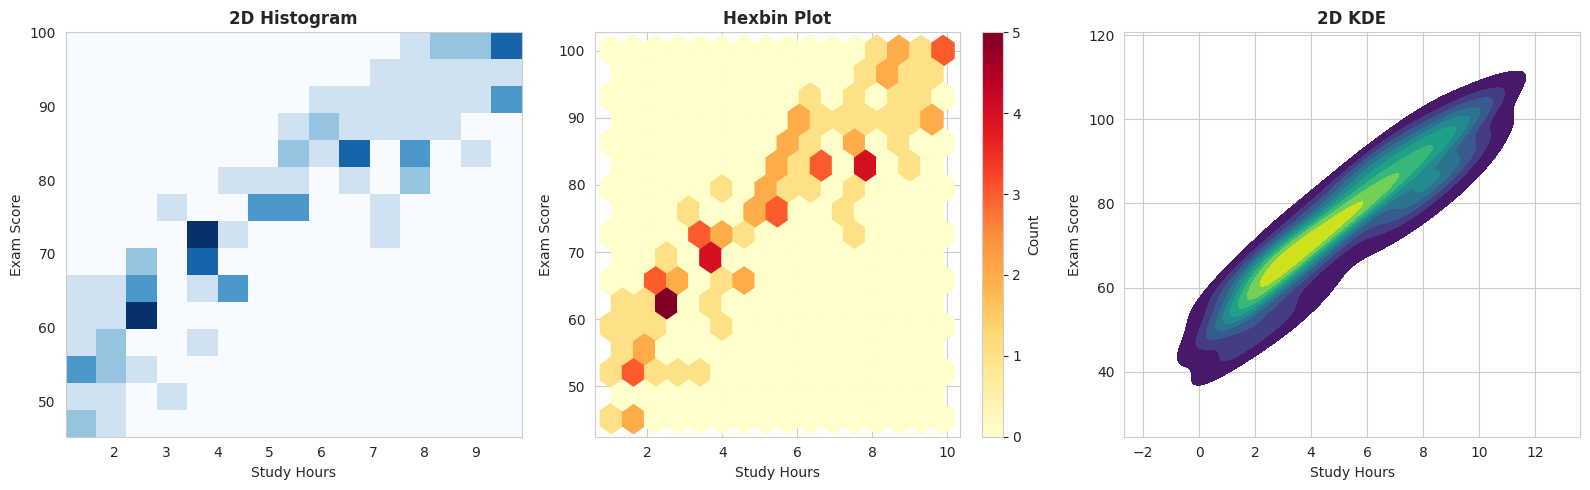

In [ ]:
# 2D density visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 2D Histogram
axes[0].hist2d(student_data['study_hours'], student_data['exam_score'],
               bins=15, cmap='Blues')
axes[0].set_xlabel('Study Hours')
axes[0].set_ylabel('Exam Score')
axes[0].set_title('2D Histogram', fontweight='bold')

# Hexbin plot
hb = axes[1].hexbin(student_data['study_hours'], student_data['exam_score'],
                    gridsize=15, cmap='YlOrRd')
plt.colorbar(hb, ax=axes[1], label='Count')
axes[1].set_xlabel('Study Hours')
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Hexbin Plot', fontweight='bold')

# KDE 2D
sns.kdeplot(data=student_data, x='study_hours', y='exam_score',
            cmap='viridis', fill=True, ax=axes[2])
axes[2].set_xlabel('Study Hours')
axes[2].set_ylabel('Exam Score')
axes[2].set_title('2D KDE', fontweight='bold')

plt.tight_layout()
plt.show()

---
# 🔷 Exercise 7: Pair Plots and Joint Plots

**Purpose:** Explore relationships between multiple variables at once

### 7.1 Pair Plot

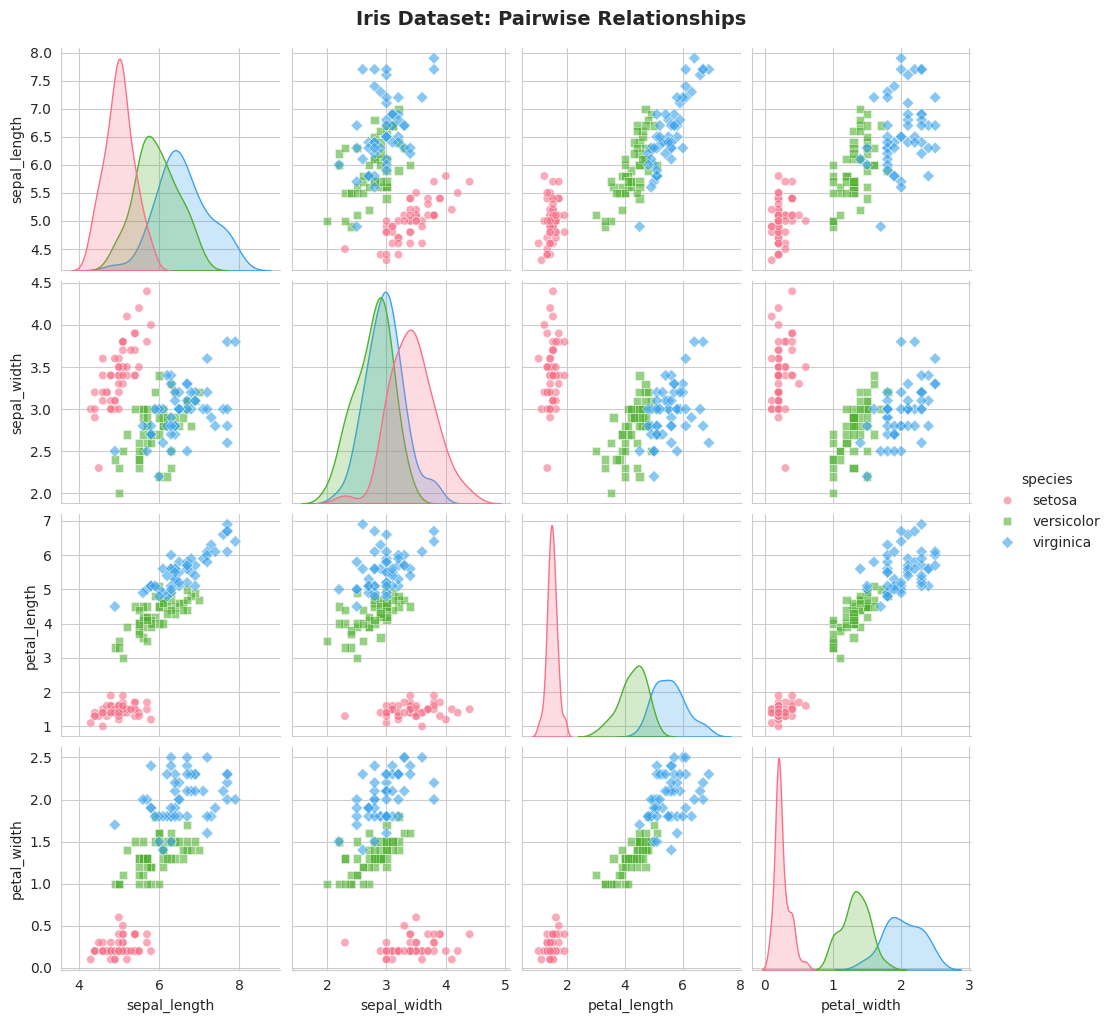

In [ ]:
# Pair plot for iris dataset
g = sns.pairplot(iris, hue='species', palette='husl',
                 diag_kind='kde', markers=['o', 's', 'D'],
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('Iris Dataset: Pairwise Relationships', fontsize=14, fontweight='bold', y=1.02)

plt.show()

### 7.2 Joint Plot

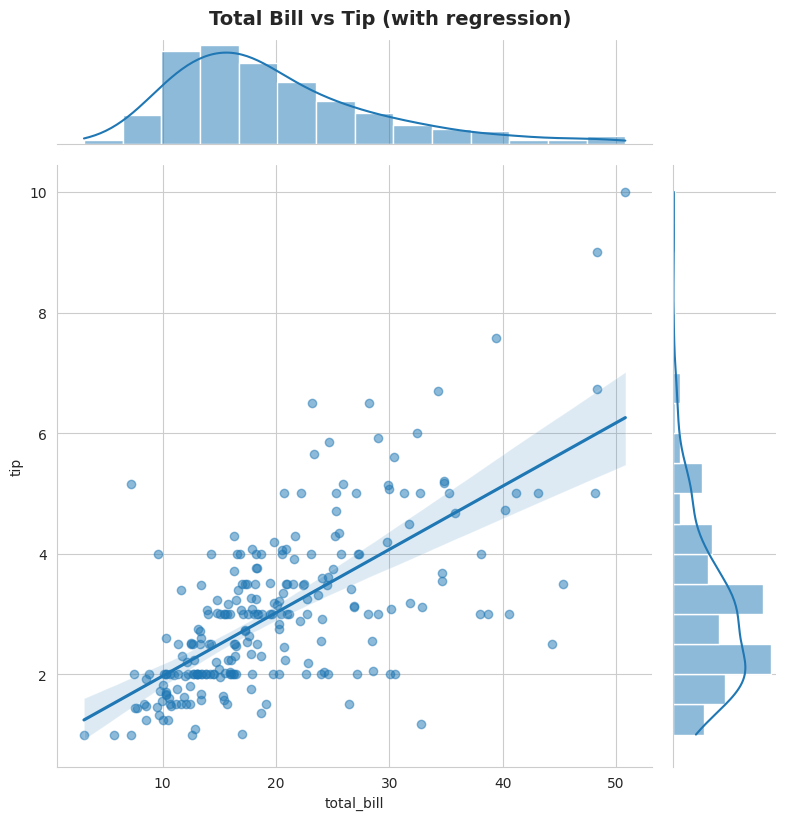

In [ ]:
# Joint plot with regression line
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg',
                  height=8, scatter_kws={'alpha': 0.5})

g.fig.suptitle('Total Bill vs Tip (with regression)', fontsize=14, fontweight='bold', y=1.02)

plt.show()

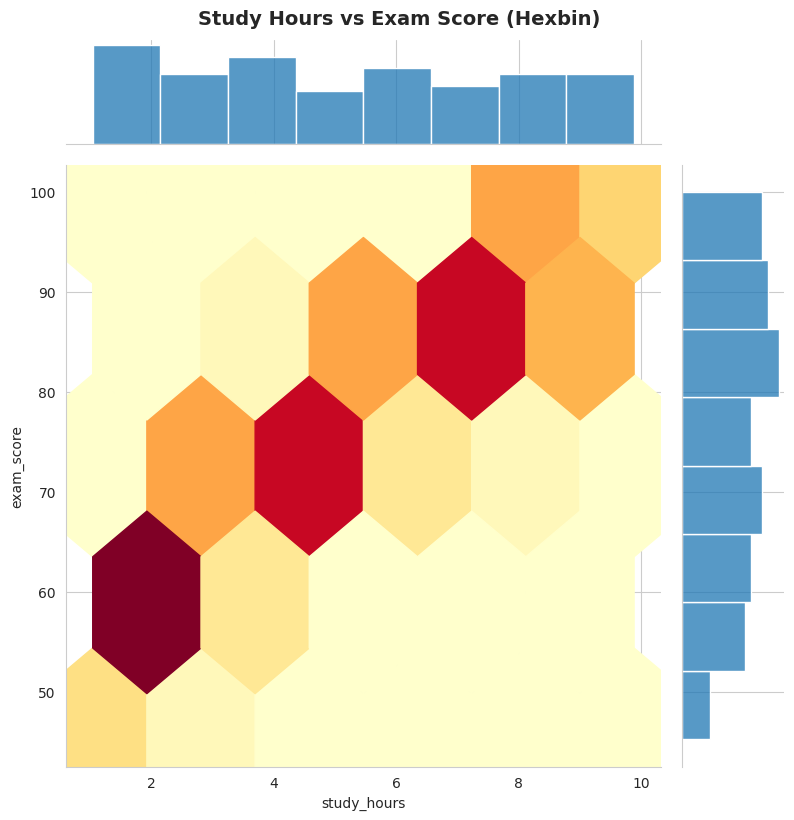

In [ ]:
# Joint plot with hexbin
g = sns.jointplot(data=student_data, x='study_hours', y='exam_score',
                  kind='hex', cmap='YlOrRd', height=8)

g.fig.suptitle('Study Hours vs Exam Score (Hexbin)', fontsize=14, fontweight='bold', y=1.02)

plt.show()

---
# 🥧 Exercise 8: Pie Charts and Donut Charts

**Purpose:** Show proportions of a whole

**When to use:**
- Part-to-whole relationships
- Limited categories (< 6 recommended)

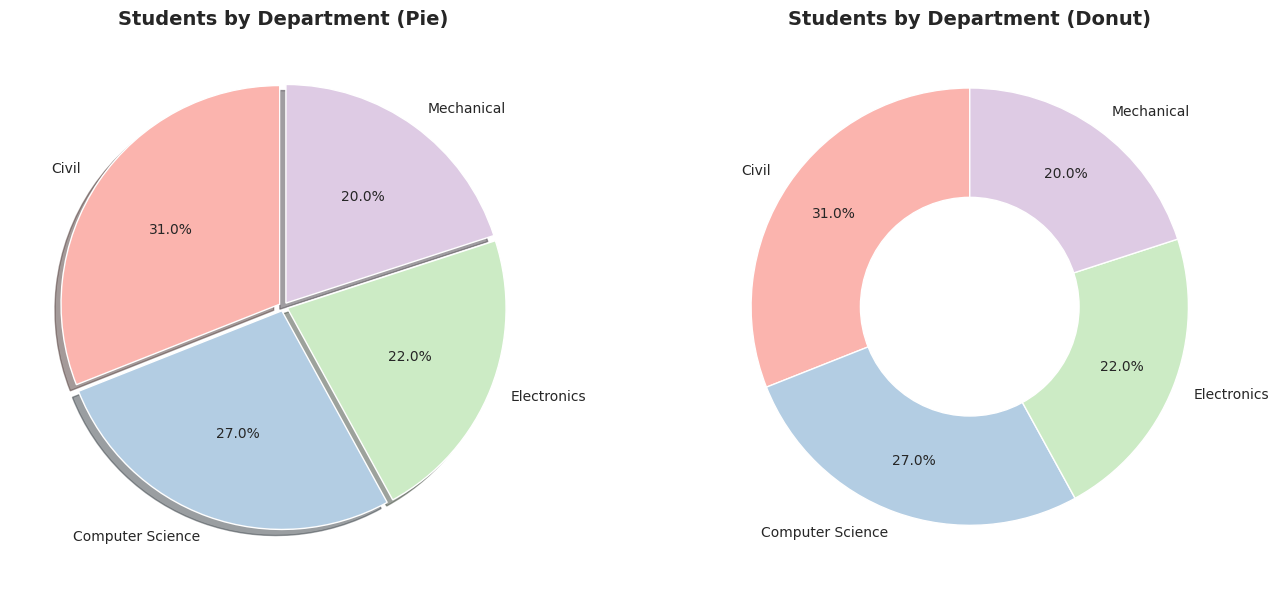

In [ ]:
# Pie chart and Donut chart
dept_counts = student_data['department'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
colors = plt.cm.Pastel1(range(len(dept_counts)))
axes[0].pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=[0.02]*len(dept_counts),
            shadow=True)
axes[0].set_title('Students by Department (Pie)', fontweight='bold', fontsize=14)

# Donut Chart
wedges, texts, autotexts = axes[1].pie(dept_counts.values, labels=dept_counts.index,
                                        autopct='%1.1f%%', colors=colors,
                                        startangle=90, pctdistance=0.75)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
axes[1].add_patch(centre_circle)
axes[1].set_title('Students by Department (Donut)', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

---
# 🎨 Exercise 9: Subplots and Figure Layout

**Purpose:** Combine multiple visualizations in a single figure

/tmp/ipython-input-2351198336.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_data, x='gender', y='exam_score', palette='Set2', ax=ax3)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/tmp/ipython-input-2351198336.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


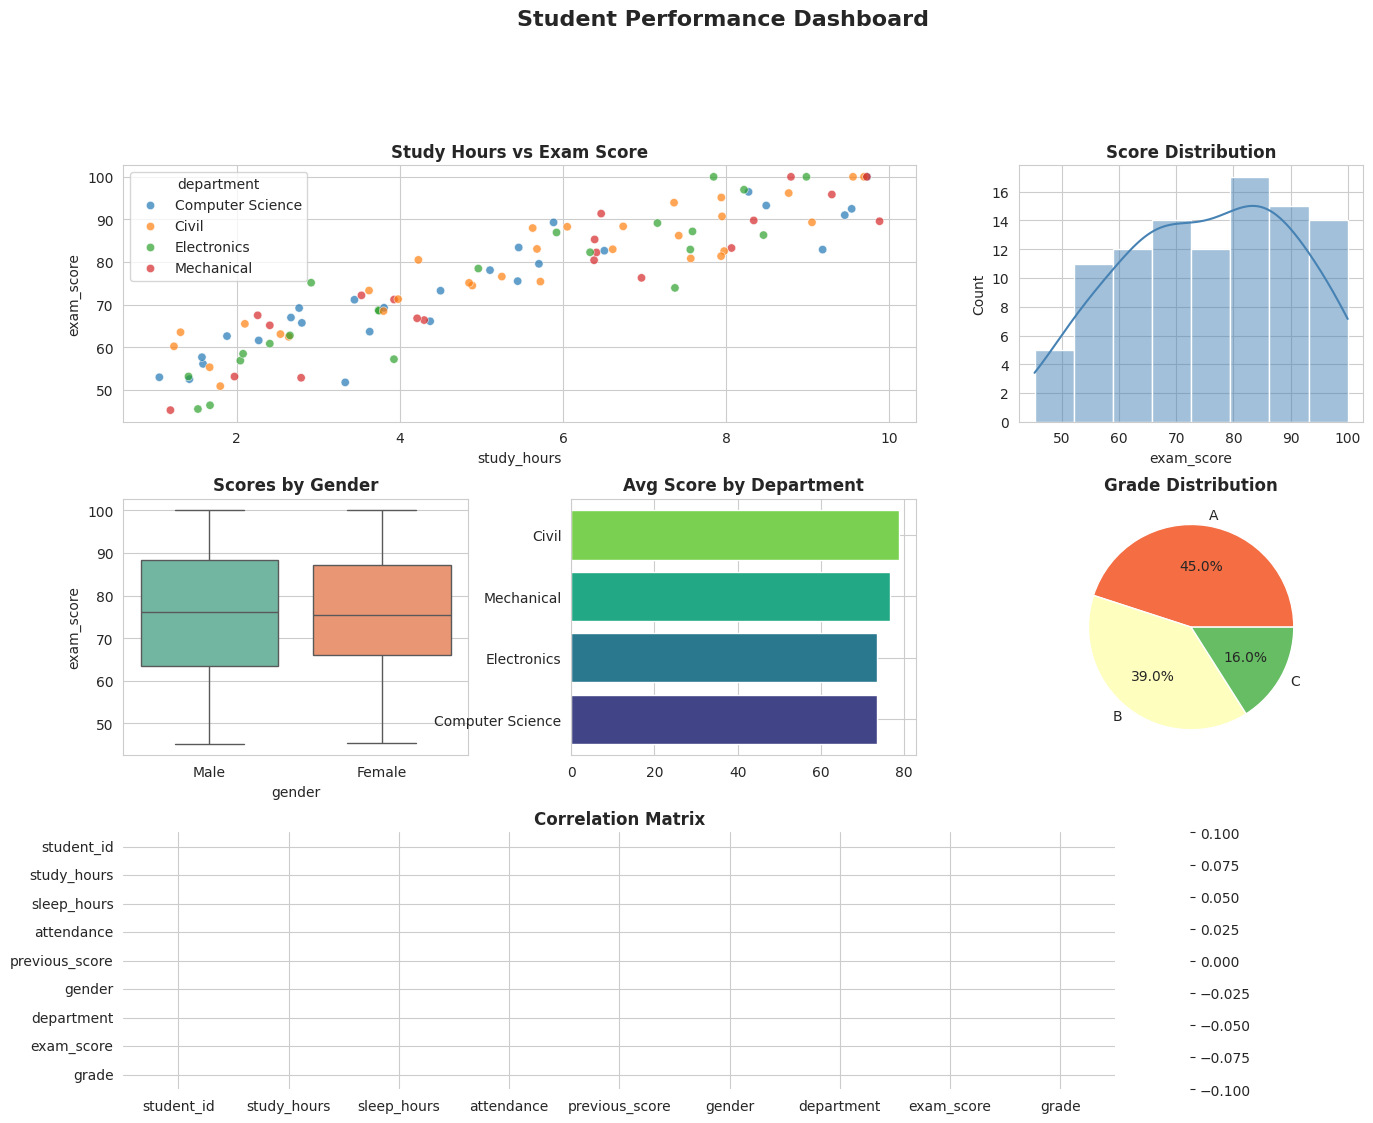

In [ ]:
# Complex subplot layout
fig = plt.figure(figsize=(16, 12))

# Create grid spec for custom layout
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Row 1: Scatter plot (spans 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
sns.scatterplot(data=student_data, x='study_hours', y='exam_score',
                hue='department', alpha=0.7, ax=ax1)
ax1.set_title('Study Hours vs Exam Score', fontweight='bold')

# Row 1: Histogram
ax2 = fig.add_subplot(gs[0, 2])
sns.histplot(data=student_data, x='exam_score', kde=True, ax=ax2, color='steelblue')
ax2.set_title('Score Distribution', fontweight='bold')

# Row 2: Box plot
ax3 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=student_data, x='gender', y='exam_score', palette='Set2', ax=ax3)
ax3.set_title('Scores by Gender', fontweight='bold')

# Row 2: Bar plot
ax4 = fig.add_subplot(gs[1, 1])
dept_means = student_data.groupby('department')['exam_score'].mean().sort_values()
ax4.barh(dept_means.index, dept_means.values, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(dept_means))))
ax4.set_title('Avg Score by Department', fontweight='bold')

# Row 2: Pie chart
ax5 = fig.add_subplot(gs[1, 2])
grade_counts = student_data['grade'].value_counts()
ax5.pie(grade_counts.values, labels=grade_counts.index, autopct='%1.1f%%',
        colors=plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(grade_counts))))
ax5.set_title('Grade Distribution', fontweight='bold')

# Row 3: Heatmap (spans full width)
ax6 = fig.add_subplot(gs[2, :])
corr = student_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, ax=ax6)
ax6.set_title('Correlation Matrix', fontweight='bold')

fig.suptitle('Student Performance Dashboard', fontsize=16, fontweight='bold', y=1.01)

plt.tight_layout()
plt.show()

---
# 🎯 Exercise 10: Facet Grids (Small Multiples)

**Purpose:** Create multiple similar plots for different subsets of data

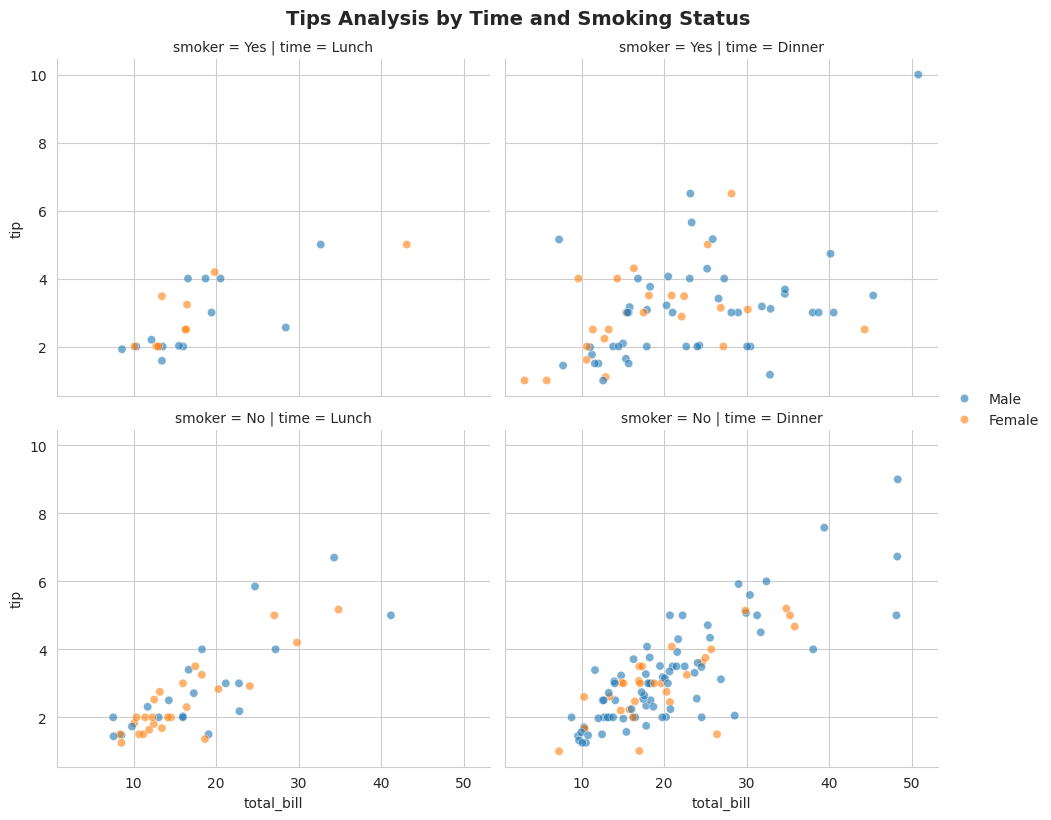

In [ ]:
# FacetGrid for comparing across categories
g = sns.FacetGrid(tips, col='time', row='smoker', height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', hue='sex', alpha=0.6)
g.add_legend()
g.fig.suptitle('Tips Analysis by Time and Smoking Status', fontsize=14, fontweight='bold', y=1.02)

plt.show()

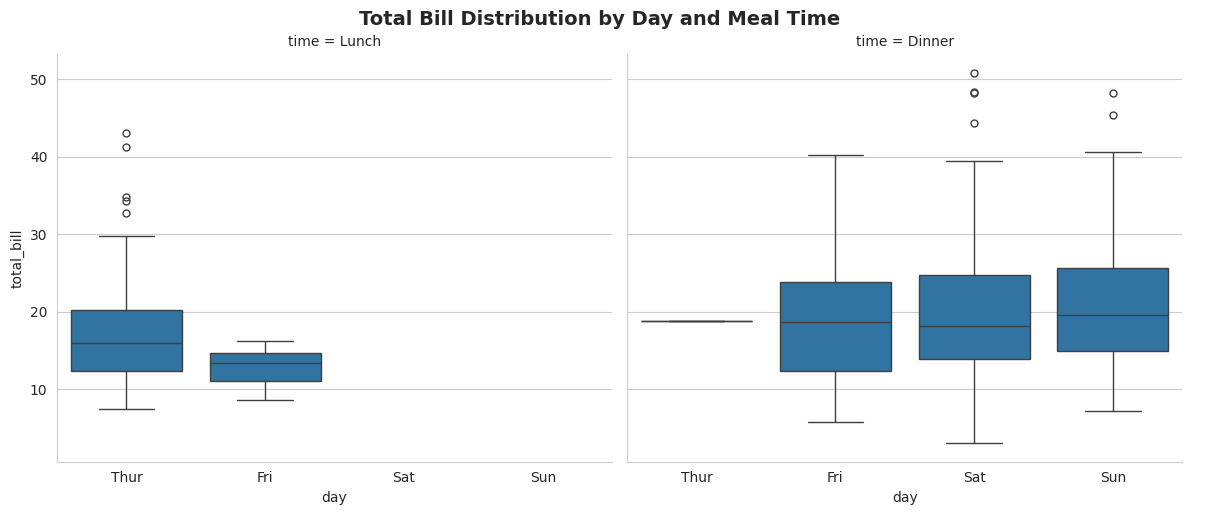

In [ ]:
# Catplot for categorical comparisons
g = sns.catplot(data=tips, x='day', y='total_bill', col='time',
                kind='box', height=5, aspect=1.2,
                order=['Thur', 'Fri', 'Sat', 'Sun'])

g.fig.suptitle('Total Bill Distribution by Day and Meal Time', fontsize=14, fontweight='bold', y=1.02)

plt.show()

---
# 💾 Exercise 11: Saving Visualizations

Uncomment the savefig lines to save the figure!


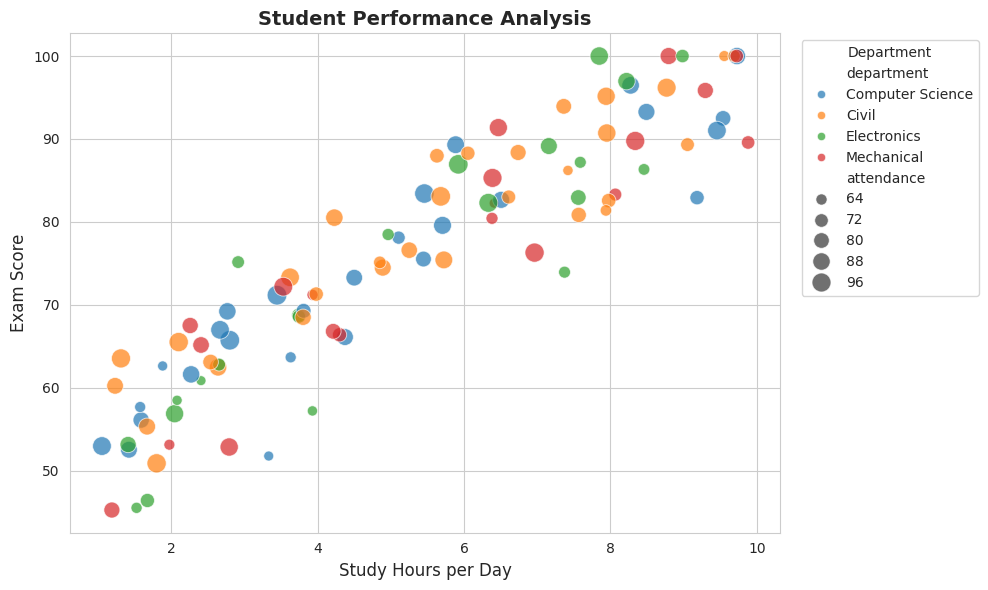

In [ ]:
# Create a publication-ready figure
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=student_data, x='study_hours', y='exam_score',
                hue='department', size='attendance', sizes=(50, 200),
                alpha=0.7, ax=ax)

ax.set_xlabel('Study Hours per Day', fontsize=12)
ax.set_ylabel('Exam Score', fontsize=12)
ax.set_title('Student Performance Analysis', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Department')

plt.tight_layout()

# Save in multiple formats
# fig.savefig('student_performance.png', dpi=300, bbox_inches='tight')
# fig.savefig('student_performance.pdf', bbox_inches='tight')
# fig.savefig('student_performance.svg', bbox_inches='tight')

print("Uncomment the savefig lines to save the figure!")
plt.show()

---
# 🏆 Final Challenge: Complete Dashboard

Create a comprehensive visualization dashboard analyzing the `tips` dataset.

**Requirements:**
1. At least 6 different types of plots
2. Use both Matplotlib and Seaborn
3. Include proper titles, labels, and legends
4. Use a consistent color scheme

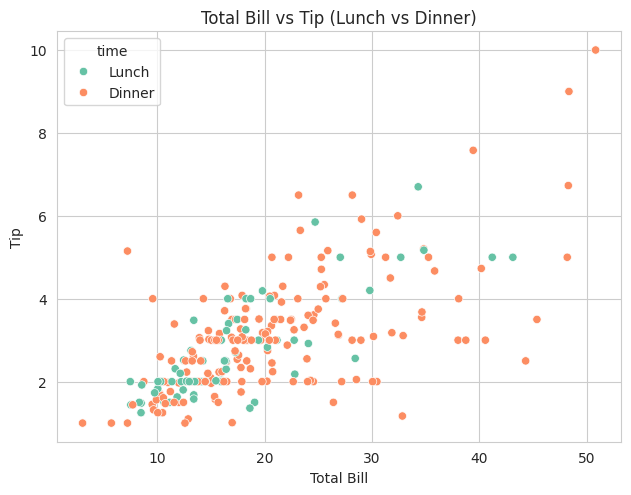

In [ ]:
# YOUR DASHBOARD CODE HERE
# Start with:
# fig = plt.figure(figsize=(18, 14))
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
palette = "Set2"

fig = plt.figure(figsize=(18, 14))

#Plot 1: Scatter Plot
ax1 = fig.add_subplot(3, 3, 1)
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    palette=palette,
    ax=ax1
)
ax1.set_title("Total Bill vs Tip (Lunch vs Dinner)")
ax1.set_xlabel("Total Bill")
ax1.set_ylabel("Tip")
# Adjust layout
plt.tight_layout()
plt.show()



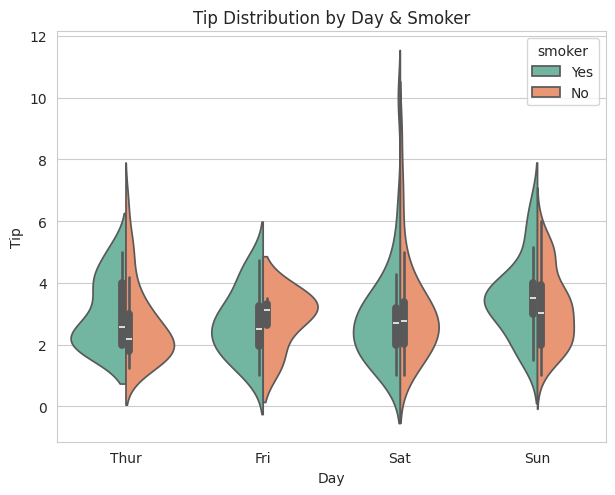

In [ ]:
#Plot 2: Violin Plot
sns.set_style("whitegrid")
palette = "Set2"
fig = plt.figure(figsize=(18, 14))
ax2 = fig.add_subplot(3, 3, 2)
sns.violinplot(
    data=tips,
    x="day",
    y="tip",
    hue="smoker",
    split=True,
    palette=palette,
    ax=ax2
)
ax2.set_title("Tip Distribution by Day & Smoker")
ax2.set_xlabel("Day")
ax2.set_ylabel("Tip")
# Adjust layout
plt.tight_layout()
plt.show()

/tmp/ipython-input-4008077814.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


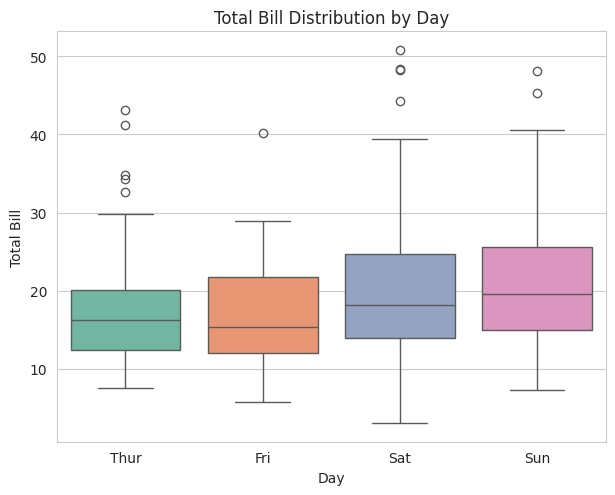

In [ ]:
#Plot 3: Box Plot
sns.set_style("whitegrid")
palette = "Set2"
fig = plt.figure(figsize=(18, 14))
ax3 = fig.add_subplot(3, 3, 3)
sns.boxplot(
    data=tips,
    x="day",
    y="total_bill",
    palette=palette,
    ax=ax3
)
ax3.set_title("Total Bill Distribution by Day")
ax3.set_xlabel("Day")
ax3.set_ylabel("Total Bill")
# Adjust layout
plt.tight_layout()
plt.show()

/tmp/ipython-input-3829521003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


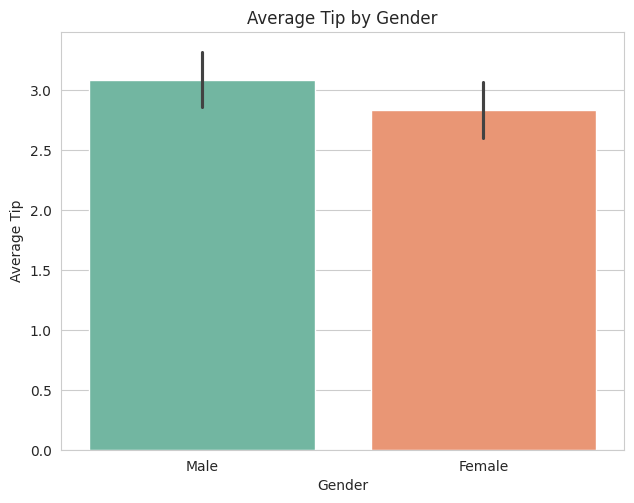

In [ ]:
#Plot 4: Bar Plot
sns.set_style("whitegrid")
palette = "Set2"
fig = plt.figure(figsize=(18, 14))
ax4 = fig.add_subplot(3, 3, 4)
sns.barplot(
    data=tips,
    x="sex",
    y="tip",
    palette=palette,
    ax=ax4
)
ax4.set_title("Average Tip by Gender")
ax4.set_xlabel("Gender")
ax4.set_ylabel("Average Tip")
# Adjust layout
plt.tight_layout()
plt.show()

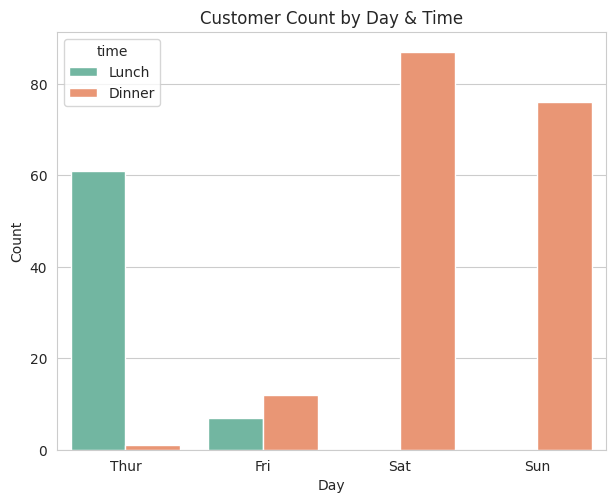

In [ ]:
#Plot 5: Count Plot
sns.set_style("whitegrid")
palette = "Set2"
fig = plt.figure(figsize=(18, 14))
ax5 = fig.add_subplot(3, 3, 5)
sns.countplot(
    data=tips,
    x="day",
    hue="time",
    palette=palette,
    ax=ax5
)
ax5.set_title("Customer Count by Day & Time")
ax5.set_xlabel("Day")
ax5.set_ylabel("Count")
# Adjust layout
plt.tight_layout()
plt.show()

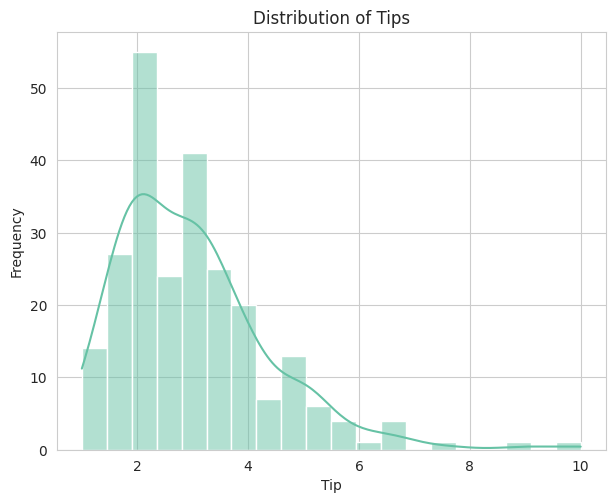

In [ ]:
#Plot 6: Histogram
sns.set_style("whitegrid")
palette = "Set2"
fig = plt.figure(figsize=(18, 14))
ax6 = fig.add_subplot(3, 3, 6)
sns.histplot(
    tips["tip"],
    bins=20,
    kde=True,
    color=sns.color_palette(palette)[0],
    ax=ax6
)
ax6.set_title("Distribution of Tips")
ax6.set_xlabel("Tip")
ax6.set_ylabel("Frequency")
# Adjust layout
plt.tight_layout()
plt.show()

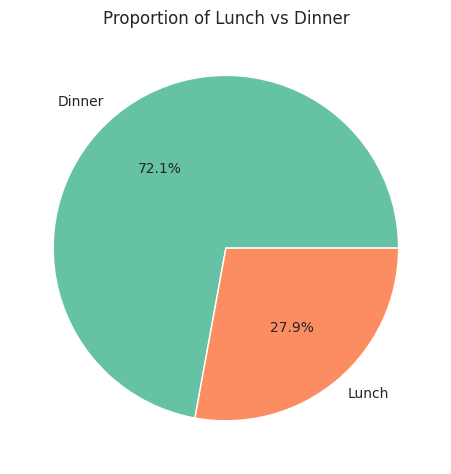

In [ ]:
#Plot 7: Pie Chart (Matplotlib)
sns.set_style("whitegrid")
palette = "Set2"
fig = plt.figure(figsize=(18, 14))
ax7 = fig.add_subplot(3, 3, 7)
time_counts = tips["time"].value_counts()
ax7.pie(
    time_counts,
    labels=time_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette(palette)
)
ax7.set_title("Proportion of Lunch vs Dinner")

# Adjust layout
plt.tight_layout()
plt.show()

---
# 📚 Quick Reference: When to Use Each Plot Type

| Plot Type | Use When | Key Function |
|-----------|----------|-------------|
| **Scatter** | Relationship between 2 numeric variables | `plt.scatter()`, `sns.scatterplot()` |
| **Line** | Trends over time or ordered data | `plt.plot()`, `sns.lineplot()` |
| **Bar** | Comparing categories | `plt.bar()`, `sns.barplot()` |
| **Histogram** | Distribution of single variable | `plt.hist()`, `sns.histplot()` |
| **Box** | Distribution summary + outliers | `plt.boxplot()`, `sns.boxplot()` |
| **Violin** | Distribution shape comparison | `sns.violinplot()` |
| **Heatmap** | Matrix data, correlations | `sns.heatmap()` |
| **Pie/Donut** | Part-to-whole (few categories) | `plt.pie()` |
| **Pair** | All pairwise relationships | `sns.pairplot()` |
| **Joint** | Two variables + marginal distributions | `sns.jointplot()` |

---
## 🎓 Lab Complete!

You have learned:
- ✅ Creating scatter, line, and bar plots
- ✅ Building heatmaps for correlation analysis
- ✅ Understanding distributions with histograms and box plots
- ✅ Combining multiple visualizations
- ✅ Customizing plots for publication

**Next Steps:**
- Practice with your own datasets
- Explore interactive libraries (Plotly, Bokeh)
- Learn animation with Matplotlib